<a href="https://colab.research.google.com/github/Sk0108/AI_Project/blob/Continued/AIProject2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AI Project: Crime Analysis**

**Phase 1**: *Importing Government dataset and analysis of data avalaible*

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Load the CSV file, specifying the correct path
# If the file is in the same directory as your notebook:
file_path = '/content/drive/My Drive/AIProjectDatabase/crimes_cleaned.csv'  # Update with your actual file path
df = pd.read_csv(file_path)

# Display the shape of the dataset (rows, columns)
print("Dataset shape:", df.shape)
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
print(df.head())
print(df.info())


Dataset shape: (9397, 33)
         STATE/UT   DISTRICT  YEAR  MURDER  ATTEMPT TO MURDER  \
0  ANDHRA PRADESH   ADILABAD  2013      96                 72   
1  ANDHRA PRADESH  ANANTAPUR  2013     156                149   
2  ANDHRA PRADESH   CHITTOOR  2013      72                 61   
3  ANDHRA PRADESH   CUDDAPAH  2013      93                107   
4  ANDHRA PRADESH  CYBERABAD  2013     162                123   

   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
0                                         13    61               0   
1                                          3    28               0   
2                                          2    31               0   
3                                          7    19               0   
4                                         16   138               0   

   OTHER RAPE  KIDNAPPING & ABDUCTION  \
0          61                      65   
1          28                     110   
2          31                      52  

**Phase-2**: *Performing Exploratory Analysis and analysing basic trends*

In [5]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
file_path = '/content/drive/My Drive/AIProjectDatabase/crimes_cleaned.csv'
if os.path.exists(file_path):
    data = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
else:
    raise FileNotFoundError(f"File not found: {file_path}")
print("Data Information: ")
data.info()
print("\n Descriptive Statistics: ")
descriptive_stats= data.describe()
print(descriptive_stats)

Dataset loaded successfully.
Data Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9397 entries, 0 to 9396
Data columns (total 33 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             9397 non-null   object
 1   DISTRICT                                             9397 non-null   object
 2   YEAR                                                 9397 non-null   int64 
 3   MURDER                                               9397 non-null   int64 
 4   ATTEMPT TO MURDER                                    9397 non-null   int64 
 5   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER            9397 non-null   int64 
 6   RAPE                                                 9397 non-null   int64 
 7   CUSTODIAL RAPE                                       9397 non-null   int64 
 8   OTHER RAPE                    

**Phase-3**: *Data visualization using **Boxplots, Piecharts** and **trend lines** to better understand the patterns and dynamics of crimes in India*

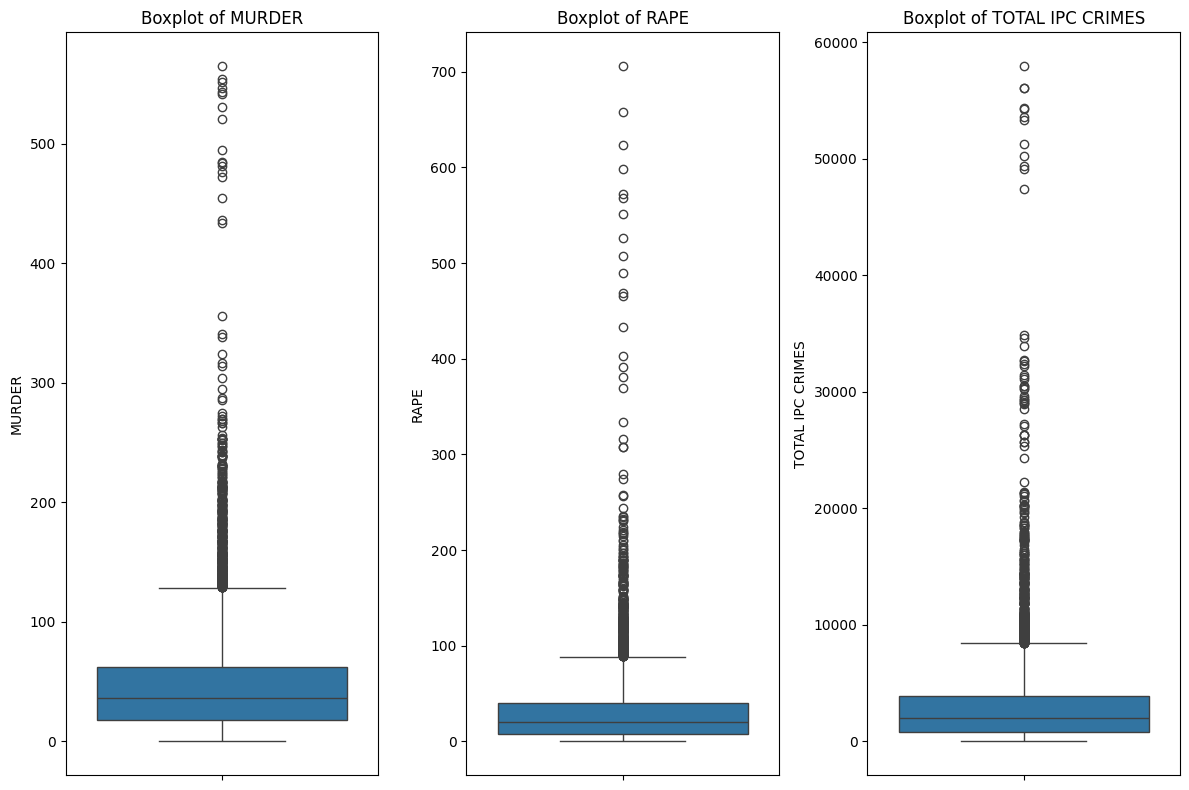

In [6]:
# Visualizing outliers using boxplots for selected columns
columns_of_interest = ['MURDER', 'RAPE', 'TOTAL IPC CRIMES']
plt.figure(figsize=(12, 8))
for i, col in enumerate(columns_of_interest, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

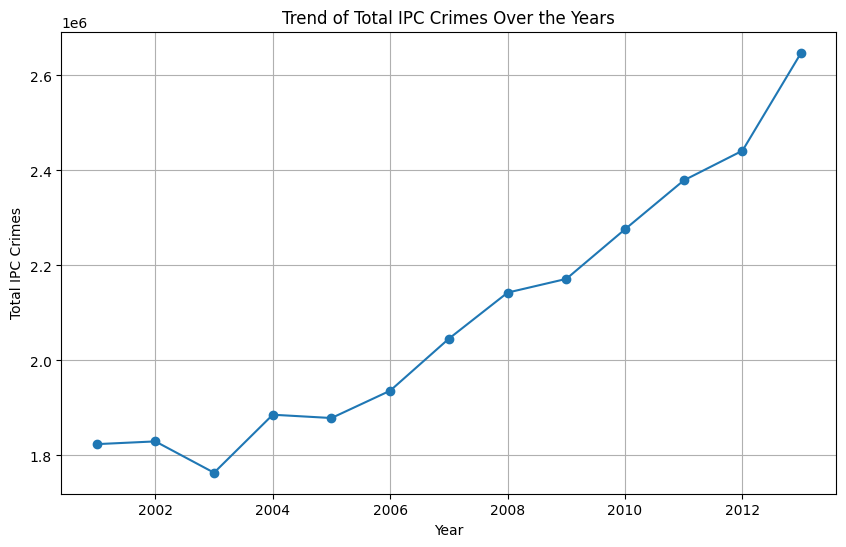

In [7]:
# 2. Yearly Trend of Total IPC Crimes
plt.figure(figsize=(10, 6))
data.groupby('YEAR')['TOTAL IPC CRIMES'].sum().plot(marker='o')
plt.title('Trend of Total IPC Crimes Over the Years')
plt.ylabel('Total IPC Crimes')
plt.xlabel('Year')
plt.grid(True)
plt.show()

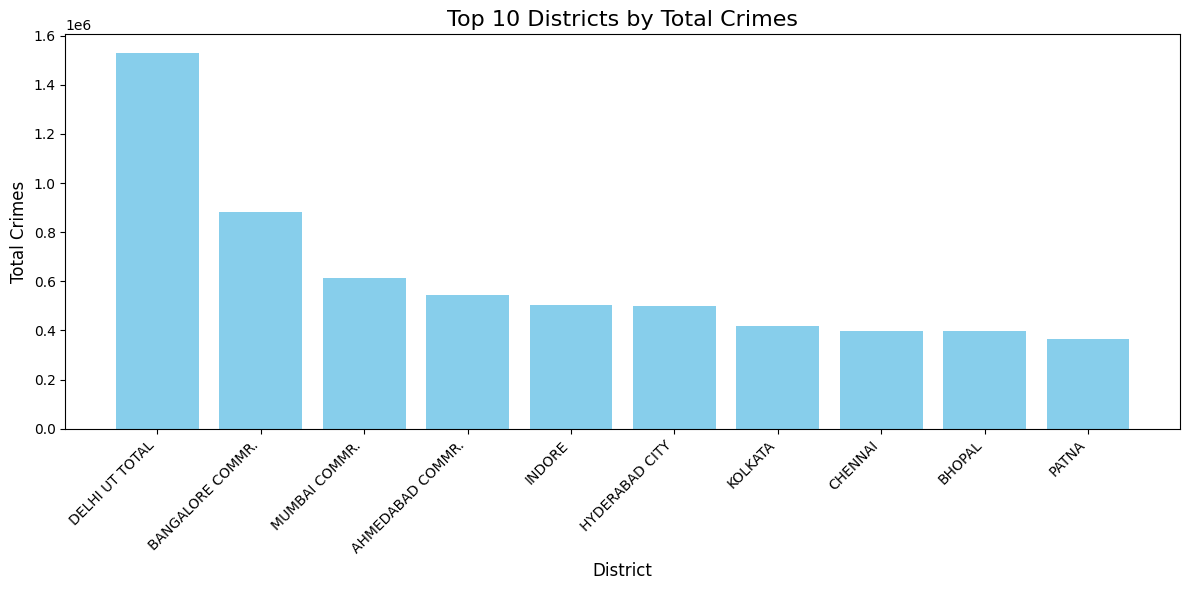

In [8]:
crime_data = data

# Function to plot top 10 districts by total crimes
def top_dus_crimes(crime_data):
    # Drop unnecessary columns for calculation
    remcol = ['STATE/UT', 'DISTRICT', 'YEAR']
    crime_variables = [col for col in crime_data.columns if col not in remcol]

    # Calculate total crimes per district by summing all crime variables
    crime_data['TOTAL_CRIMES'] = crime_data[crime_variables].sum(axis=1)

    # Filter out districts named 'TOTAL' and 'ZZ TOTAL'
    crime_data_filtered = crime_data[~crime_data['DISTRICT'].isin(['TOTAL', 'ZZ TOTAL'])]

    # Group by district and sum the total crimes across years
    district_crime_totals = crime_data_filtered.groupby('DISTRICT')['TOTAL_CRIMES'].sum().reset_index()

    # Sort the data to get the top 10 districts with the highest total crimes
    top_10_districts = district_crime_totals.sort_values(by='TOTAL_CRIMES', ascending=False).head(10)

    # Create bar plot for the top 10 districts
    plt.figure(figsize=(12, 6))
    plt.bar(top_10_districts['DISTRICT'], top_10_districts['TOTAL_CRIMES'], color='skyblue')

    # Add titles and labels
    plt.title('Top 10 Districts by Total Crimes', fontsize=16)
    plt.xlabel('District', fontsize=12)
    plt.ylabel('Total Crimes', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Call the function to plot the top 10 districts by total crimes
top_dus_crimes(crime_data)

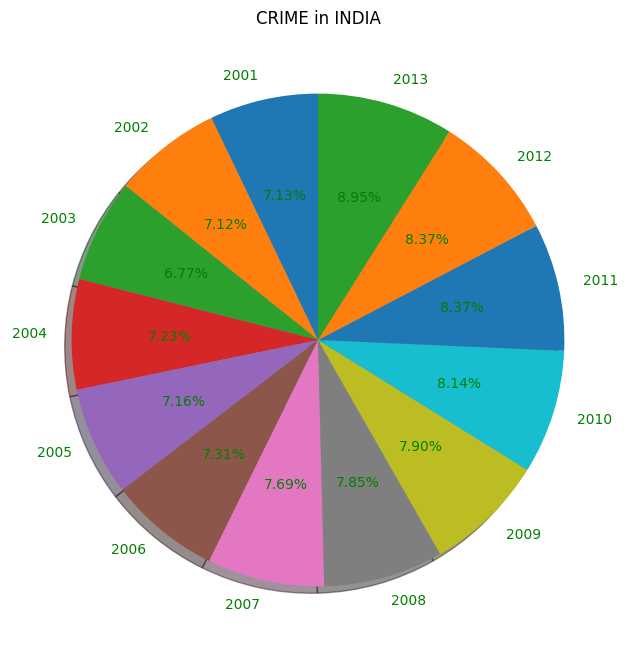

In [9]:
import matplotlib.pyplot as plt


state_mean = data.groupby('YEAR')['TOTAL IPC CRIMES'].mean()

# Create the pie chart
plt.figure(figsize=(15, 8))
plt.pie(state_mean, labels=state_mean.index, startangle=90, shadow=True,
        textprops={'fontsize': 10, 'color': 'green'}, autopct='%0.2f%%')

plt.title('CRIME in INDIA')
plt.show()

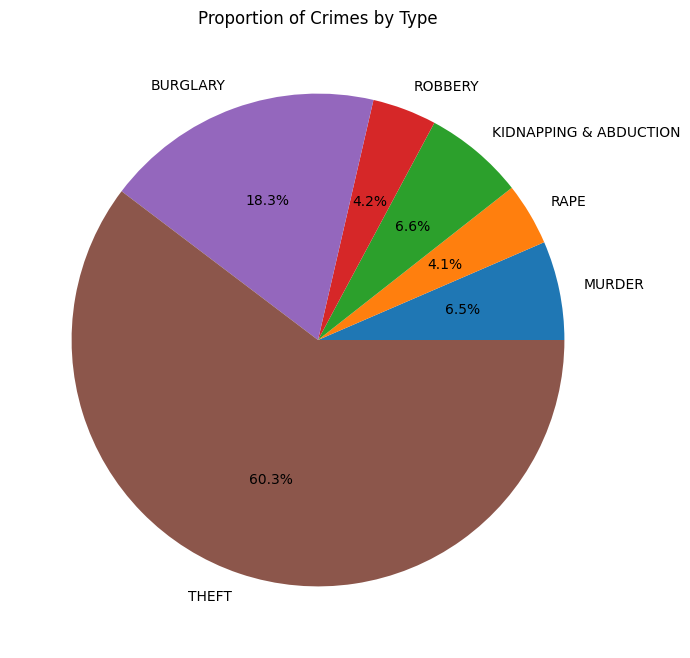

In [10]:
crime_totals = data[['MURDER', 'RAPE', 'KIDNAPPING & ABDUCTION', 'ROBBERY', 'BURGLARY', 'THEFT']].sum()

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(crime_totals.values, labels=crime_totals.index, autopct='%1.1f%%')
plt.title('Proportion of Crimes by Type')
plt.show()

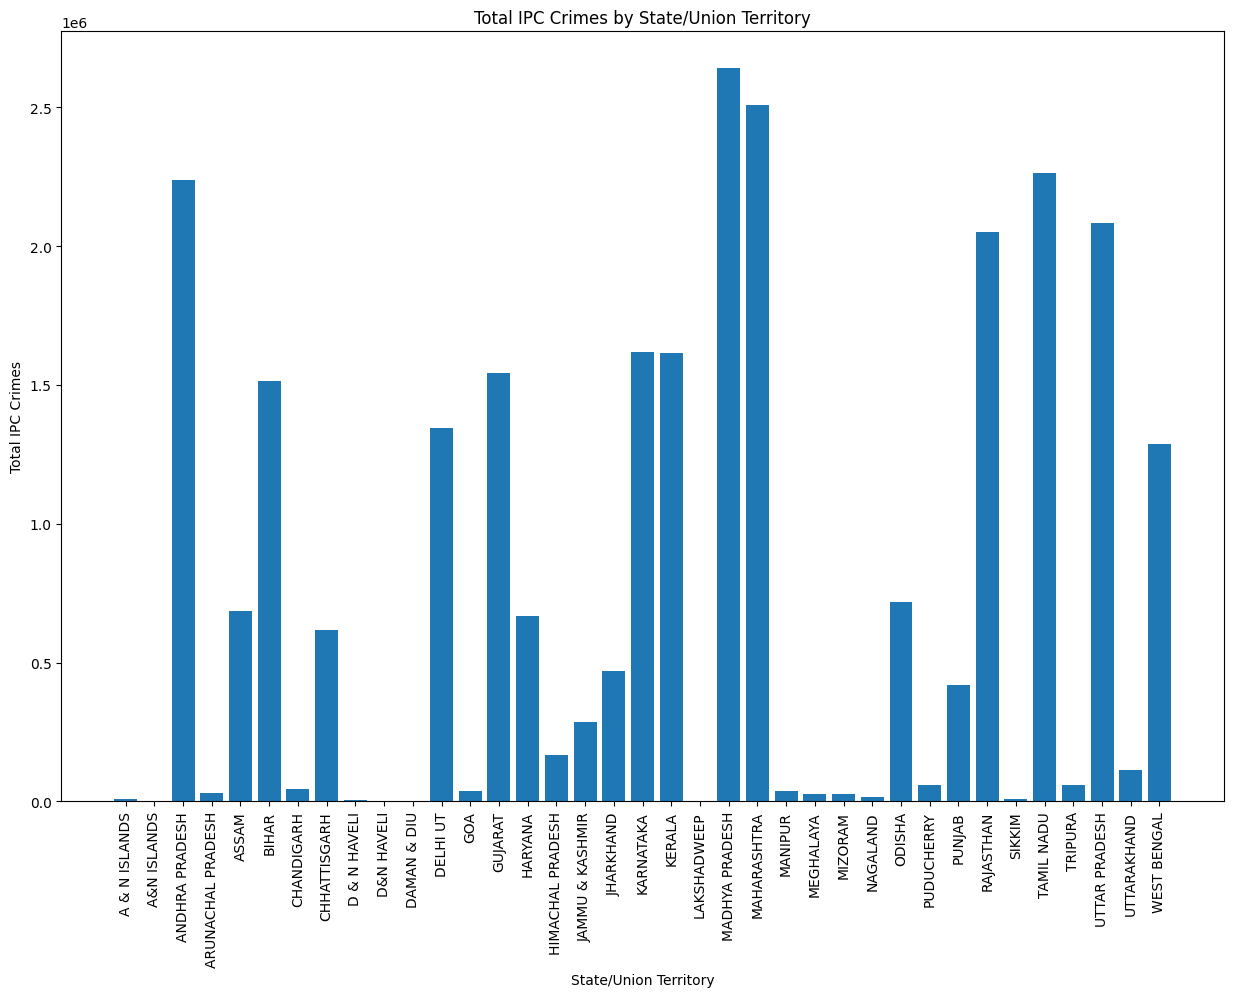

In [11]:
# Group the data by state/union territory and sum the total number of IPC crimes
state_totals = data.groupby('STATE/UT')['TOTAL IPC CRIMES'].sum()

# Create a bar chart
plt.figure(figsize=(15, 10))
plt.bar(state_totals.index, state_totals.values)
plt.xticks(rotation=90)
plt.xlabel('State/Union Territory')
plt.ylabel('Total IPC Crimes')
plt.title('Total IPC Crimes by State/Union Territory')
plt.show()

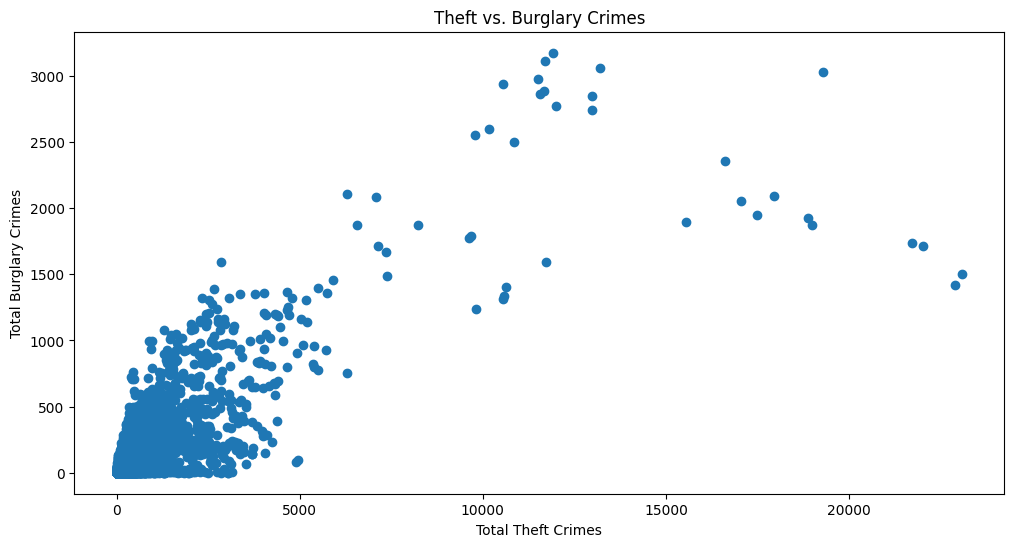

In [12]:
# Create a scatter plot of theft and burglary crimes
plt.figure(figsize=(12, 6))
plt.scatter(data['THEFT'], data['BURGLARY'])
plt.xlabel('Total Theft Crimes')
plt.ylabel('Total Burglary Crimes')
plt.title('Theft vs. Burglary Crimes')
plt.show()

**Phase-4**: *Statistical Analysis of Crime Data*

In [13]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
import statistics
import scipy.stats as stats
file_path = '/content/drive/My Drive/AIProjectDatabase/crimes_cleaned.csv'
if os.path.exists(file_path):
    crime = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
else:
    raise FileNotFoundError(f"File not found: {file_path}")
print("\n Descriptive Statistics: ")
descriptive_stats= crime.describe()
print(descriptive_stats)

Dataset loaded successfully.

 Descriptive Statistics: 
              YEAR       MURDER  ATTEMPT TO MURDER  \
count  9397.000000  9397.000000        9397.000000   
mean   2007.168884    47.030861          41.786847   
std       3.755781    45.666528          53.614888   
min    2001.000000     0.000000           0.000000   
25%    2004.000000    18.000000          10.000000   
50%    2007.000000    36.000000          27.000000   
75%    2010.000000    62.000000          54.000000   
max    2013.000000   565.000000         741.000000   

       CULPABLE HOMICIDE NOT AMOUNTING TO MURDER         RAPE  CUSTODIAL RAPE  \
count                                9397.000000  9397.000000     9397.000000   
mean                                    5.201341    29.718846        0.002873   
std                                    10.039063    37.168683        0.076455   
min                                     0.000000     0.000000        0.000000   
25%                                     0.000000    

In [14]:
crime_modified = crime.iloc[:, 2:]
crime_modified.mean()

YEAR                                                   2007.168884
MURDER                                                   47.030861
ATTEMPT TO MURDER                                        41.786847
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER                 5.201341
RAPE                                                     29.718846
CUSTODIAL RAPE                                            0.002873
OTHER RAPE                                               29.715973
KIDNAPPING & ABDUCTION                                   47.611046
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS              35.270618
KIDNAPPING AND ABDUCTION OF OTHERS                       12.340428
DACOITY                                                   6.845695
PREPARATION AND ASSEMBLY FOR DACOITY                      3.867298
ROBBERY                                                  30.504948
BURGLARY                                                132.520485
THEFT                                                   436.809407
AUTO THEFT                                              166.337874
OTHER THEFT                                             270.471533
RIOTS                                                    90.246781
CRIMINAL BREACH OF TRUST                                 22.174417
CHEATING                                                 95.887517
COUNTERFIETING                                            3.148558
ARSON                                                    13.155794
HURT/GREVIOUS HURT                                      396.802703
DOWRY DEATHS                                             10.733958
ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY      56.552942
INSULT TO MODESTY OF WOMEN                               14.720656
CRUELTY BY HUSBAND OR HIS RELATIVES                     107.404278
IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES               0.098329
CAUSING DEATH BY NEGLIGENCE                             119.281047
OTHER IPC CRIMES                                       1184.730339
TOTAL IPC CRIMES                                       2896.834096
dtype: float64

In [15]:
crime_modified.median()

YEAR                                                   2007.0
MURDER                                                   36.0
ATTEMPT TO MURDER                                        27.0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER                 2.0
RAPE                                                     20.0
CUSTODIAL RAPE                                            0.0
OTHER RAPE                                               20.0
KIDNAPPING & ABDUCTION                                   25.0
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS              18.0
KIDNAPPING AND ABDUCTION OF OTHERS                        5.0
DACOITY                                                   3.0
PREPARATION AND ASSEMBLY FOR DACOITY                      0.0
ROBBERY                                                  16.0
BURGLARY                                                 80.0
THEFT                                                   209.0
AUTO THEFT                                               47.0
OTHER THEFT                                             145.0
RIOTS                                                    44.0
CRIMINAL BREACH OF TRUST                                 11.0
CHEATING                                                 37.0
COUNTERFIETING                                            1.0
ARSON                                                     8.0
HURT/GREVIOUS HURT                                      192.0
DOWRY DEATHS                                              5.0
ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY      31.0
INSULT TO MODESTY OF WOMEN                                2.0
CRUELTY BY HUSBAND OR HIS RELATIVES                      47.0
IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES               0.0
CAUSING DEATH BY NEGLIGENCE                              68.0
OTHER IPC CRIMES                                        724.0
TOTAL IPC CRIMES                                       2039.0
dtype: float64

In [16]:
crime_modified['TOTAL IPC CRIMES'].mean()

2896.834095988081

In [17]:
crime_modified.mode()

YEAR  MURDER  ATTEMPT TO MURDER  CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  \
0  2013       0                  0                                          0   

   RAPE  CUSTODIAL RAPE  OTHER RAPE  KIDNAPPING & ABDUCTION  \
0     0               0           0                       0   

   KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS  \
0                                            0   

   KIDNAPPING AND ABDUCTION OF OTHERS  DACOITY  \
0                                   0        0   

   PREPARATION AND ASSEMBLY FOR DACOITY  ROBBERY  BURGLARY  THEFT  AUTO THEFT  \
0                                     0        0         0      0           0   

   OTHER THEFT  RIOTS  CRIMINAL BREACH OF TRUST  CHEATING  COUNTERFIETING  \
0            0      0                         0         0               0   

   ARSON  HURT/GREVIOUS HURT  DOWRY DEATHS  \
0      0                   0             0   

   ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
0                                                  0     

   INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
0                           0                                    0   

   IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES  CAUSING DEATH BY NEGLIGENCE  \
0                                            0                            0   

   OTHER IPC CRIMES  TOTAL IPC CRIMES  
0                 0               248

**InterQuartile Range**

In [18]:
numeric_data = crime_modified.select_dtypes(exclude='object')
for col in numeric_data.columns:
    Q1 = crime_modified[col].quantile(.25)
    Q3 = crime_modified[col].quantile(.75)
    IQR = Q3 - Q1
    print('IQR of %s : %d' %(col,IQR))

IQR of YEAR : 6
IQR of MURDER : 44
IQR of ATTEMPT TO MURDER : 44
IQR of CULPABLE HOMICIDE NOT AMOUNTING TO MURDER : 6
IQR of RAPE : 32
IQR of CUSTODIAL RAPE : 0
IQR of OTHER RAPE : 32
IQR of KIDNAPPING & ABDUCTION : 46
IQR of KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS : 36
IQR of KIDNAPPING AND ABDUCTION OF OTHERS : 11
IQR of DACOITY : 7
IQR of PREPARATION AND ASSEMBLY FOR DACOITY : 2
IQR of ROBBERY : 29
IQR of BURGLARY : 137
IQR of THEFT : 349
IQR of AUTO THEFT : 120
IQR of OTHER THEFT : 230
IQR of RIOTS : 105
IQR of CRIMINAL BREACH OF TRUST : 22
IQR of CHEATING : 87
IQR of COUNTERFIETING : 3
IQR of ARSON : 16
IQR of HURT/GREVIOUS HURT : 456
IQR of DOWRY DEATHS : 14
IQR of ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY : 66
IQR of INSULT TO MODESTY OF WOMEN : 12
IQR of CRUELTY BY HUSBAND OR HIS RELATIVES : 120
IQR of IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES : 0
IQR of CAUSING DEATH BY NEGLIGENCE : 165
IQR of OTHER IPC CRIMES : 1290
IQR of TOTAL IPC CRIMES : 3036


In [19]:
crime_modified.corr()

YEAR    MURDER  \
YEAR                                                1.000000 -0.058564   
MURDER                                             -0.058564  1.000000   
ATTEMPT TO MURDER                                   0.003433  0.697122   
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER          -0.025945  0.504745   
RAPE                                                0.117192  0.567113   
CUSTODIAL RAPE                                     -0.003173  0.043717   
OTHER RAPE                                          0.117208  0.567066   
KIDNAPPING & ABDUCTION                              0.139400  0.574875   
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS         0.188757  0.559306   
KIDNAPPING AND ABDUCTION OF OTHERS                  0.036546  0.517560   
DACOITY                                            -0.095927  0.514519   
PREPARATION AND ASSEMBLY FOR DACOITY                0.019487  0.319137   
ROBBERY                                             0.053627  0.530815   
BURGLARY                                           -0.032378  0.517783   
THEFT                                               0.030964  0.564367   
AUTO THEFT                                          0.078344  0.521111   
OTHER THEFT                                        -0.018321  0.545705   
RIOTS                                              -0.010335  0.364860   
CRIMINAL BREACH OF TRUST                            0.028702  0.541802   
CHEATING                                            0.101922  0.463213   
COUNTERFIETING                                      0.030062  0.356911   
ARSON                                              -0.027253  0.204793   
HURT/GREVIOUS HURT                                  0.015672  0.424389   
DOWRY DEATHS                                        0.027423  0.692987   
ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MOD...  0.099288  0.431519   
INSULT TO MODESTY OF WOMEN                         -0.014320  0.301118   
CRUELTY BY HUSBAND OR HIS RELATIVES                 0.137120  0.470499   
IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES        -0.019891  0.090900   
CAUSING DEATH BY NEGLIGENCE                         0.131168  0.502127   
OTHER IPC CRIMES                                    0.057802  0.470959   
TOTAL IPC CRIMES                                    0.061502  0.643455   

                                                    ATTEMPT TO MURDER  \
YEAR                                                         0.003433   
MURDER                                                       0.697122   
ATTEMPT TO MURDER                                            1.000000   
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER                    0.393557   
RAPE                                                         0.453365   
CUSTODIAL RAPE                                               0.035019   
OTHER RAPE                                                   0.453328   
KIDNAPPING & ABDUCTION                                       0.467756   
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS                  0.472738   
KIDNAPPING AND ABDUCTION OF OTHERS                           0.391571   
DACOITY                                                      0.324725   
PREPARATION AND ASSEMBLY FOR DACOITY                         0.280558   
ROBBERY                                                      0.444413   
BURGLARY                                                     0.406470   
THEFT                                                        0.443495   
AUTO THEFT                                                   0.413334   
OTHER THEFT                                                  0.425114   
RIOTS                                                        0.294538   
CRIMINAL BREACH OF TRUST                                     0.438173   
CHEATING                                                     0.430494   
COUNTERFIETING                                               0.309683   
ARSON                                                        0.173980   
HURT/GRE

<Axes: >

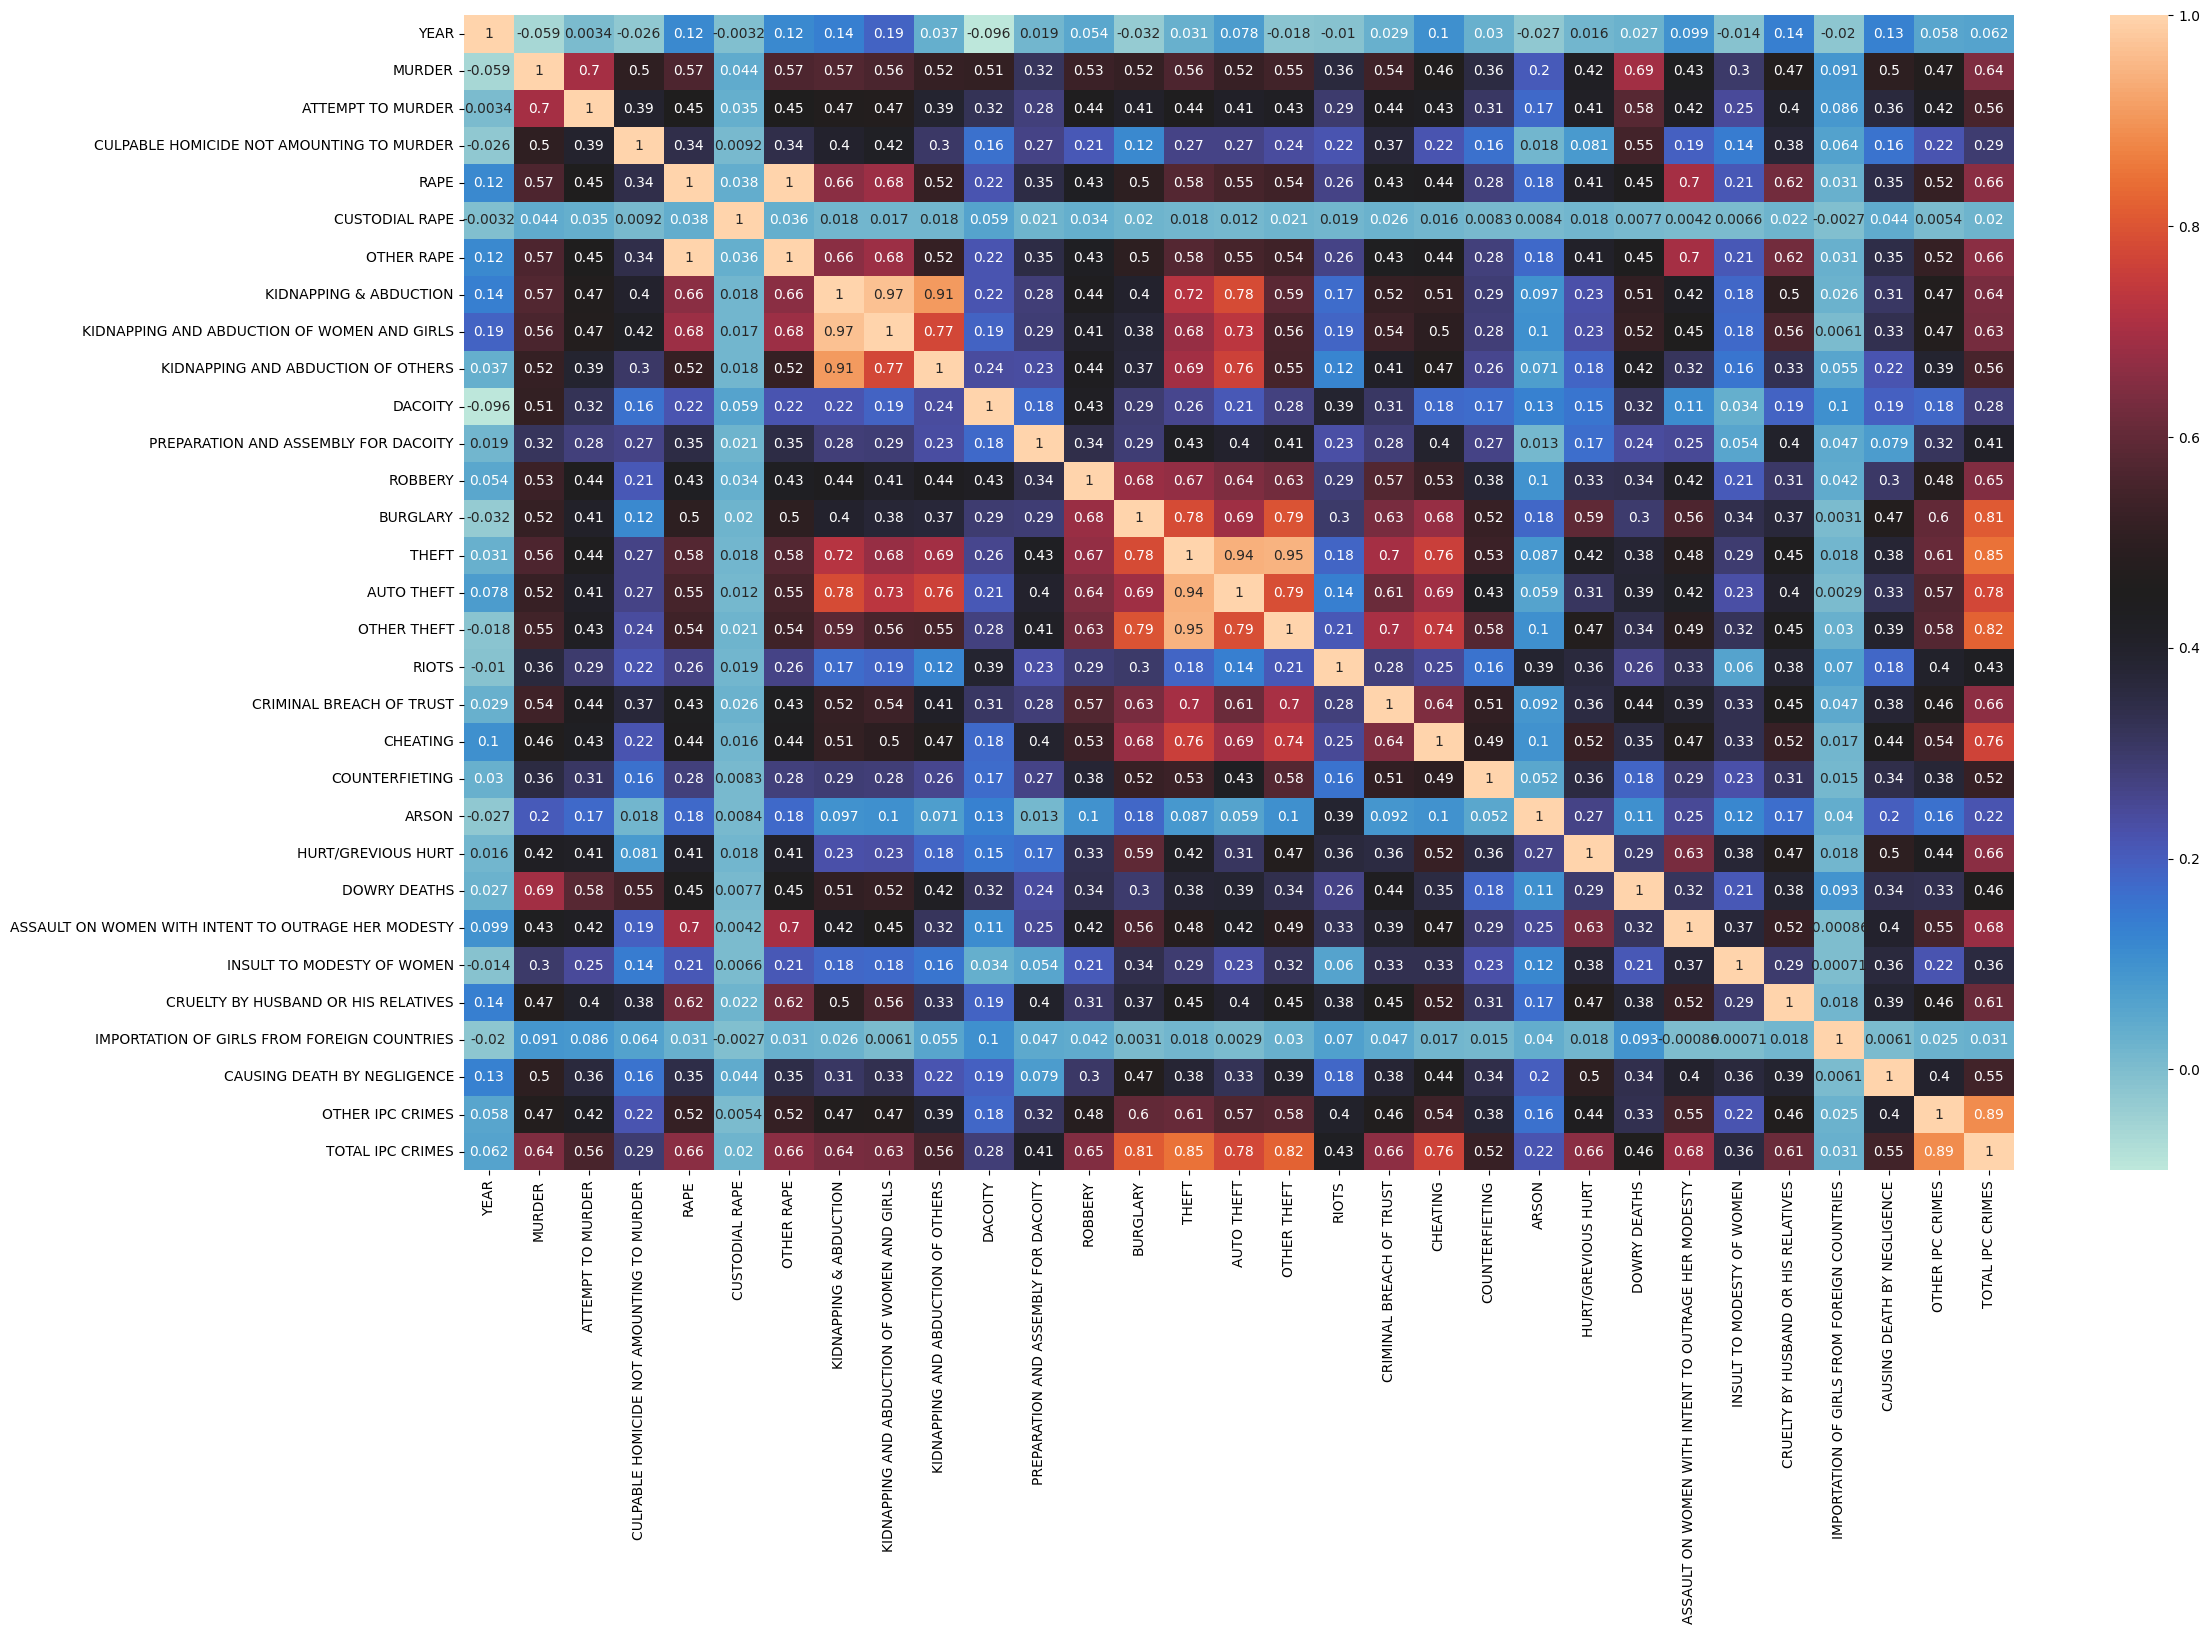

In [20]:
plt.figure(figsize=(25,15))
sns.heatmap(crime_modified.corr(),annot=True,cmap='icefire')

# **T Test**
The aim of the T-test is to determine if there was a significant difference in theft rates between Arunachal Pradesh and all other states combined. This analysis helps evaluate whether Arunachal Pradesh’s theft rates deviate from the national average.

In [21]:
from scipy.stats import ttest_ind

state = 'ARUNACHAL PRADESH'
state_thefts = crime[crime['STATE/UT']==state]['THEFT']
other_thefts = crime[crime['STATE/UT']!=state]['THEFT']

t_stat, p_val = ttest_ind(state_thefts, other_thefts)

print("State:", state)
print("t-statistic:", t_stat)
print("p-value:", p_val)
print()
if p_val < 0.05:
    print('Reject null hypothesis - Significant difference found between thefts in', state, 'and all other states combined')
else:
    print('Accept null hypothesis - No significant difference found between thefts in', state, 'and all other states combined')

State: ARUNACHAL PRADESH
t-statistic: -5.640167186526789
p-value: 1.7480293283197756e-08

Reject null hypothesis - Significant difference found between thefts in ARUNACHAL PRADESH and all other states combined


Phase-5: Geospatial Analysis

In [22]:
import pandas as pd
import numpy as np
import geopandas as gpd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

geojson_path = '/content/drive/My Drive/AIProjectDatabase/india (1).geojson'  # Adjust path if needed
india_geo = gpd.read_file(geojson_path)

# Inspect the loaded GeoDataFrame structure
print("GeoDataFrame Columns:", india_geo.columns)

# Extract the latitude and longitude from the geometry
india_geo['latitude'] = india_geo.geometry.centroid.y
india_geo['longitude'] = india_geo.geometry.centroid.x

# Extract relevant columns for merging (adjust based on your crime data)
geo_coordinates = india_geo[['district', 'latitude', 'longitude']]

#  2: Load the crime dataset
crime_data_path = '/content/drive/My Drive/AIProjectDatabase/crimes_cleaned.csv'  # Adjust path if needed
crime_data = pd.read_csv(crime_data_path)

# Ensure district names match by cleaning up whitespace and cases
crime_data['DISTRICT'] = crime_data['DISTRICT'].str.strip().str.lower()
geo_coordinates['district'] = geo_coordinates['district'].str.strip().str.lower()

#  3: Merge crime data with geo coordinates on district names
merged_data = crime_data.merge(geo_coordinates, left_on='DISTRICT', right_on='district', how='left')

# Check for any rows with missing latitude or longitude
missing_coords = merged_data[merged_data[['latitude', 'longitude']].isnull().any(axis=1)]
print("Rows with missing coordinates after merge:")
print(missing_coords[['DISTRICT', 'latitude', 'longitude']].head())

# Drop rows with missing coordinates (if any)
merged_data = merged_data.dropna(subset=['latitude', 'longitude'])



#  Convert to GeoDataFrame for visualization
gdf = gpd.GeoDataFrame(
    merged_data,
    geometry=gpd.points_from_xy(merged_data.longitude, merged_data.latitude),
    crs="EPSG:4326"
)

GeoDataFrame Columns: Index(['id', 'district', 'dt_code', 'st_nm', 'st_code', 'year', 'geometry'], dtype='object')
Rows with missing coordinates after merge:
         DISTRICT  latitude  longitude
3        cuddapah       NaN        NaN
4       cyberabad       NaN        NaN
6   guntakal rly.       NaN        NaN
8    guntur urban       NaN        NaN
9  hyderabad city       NaN        NaN


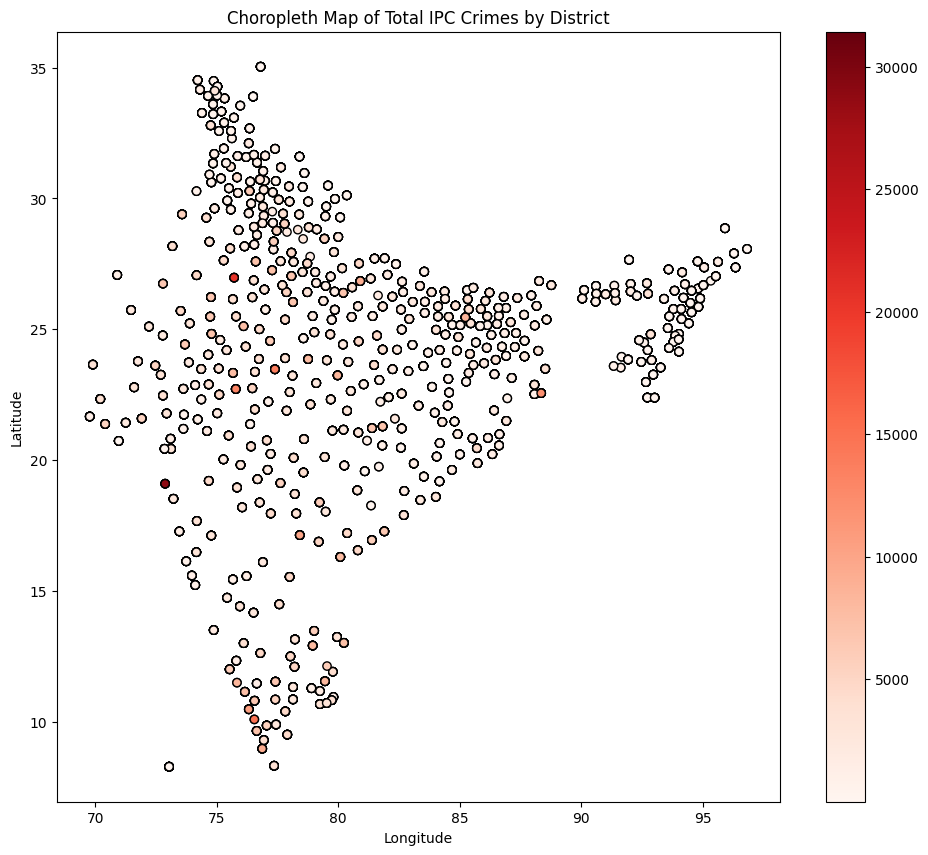

In [23]:
# Plot Total IPC Crimes as a choropleth map
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
gdf.plot(column='TOTAL IPC CRIMES',
         cmap='Reds',
         legend=True,
         ax=ax,
         edgecolor='black')
plt.title('Choropleth Map of Total IPC Crimes by District')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

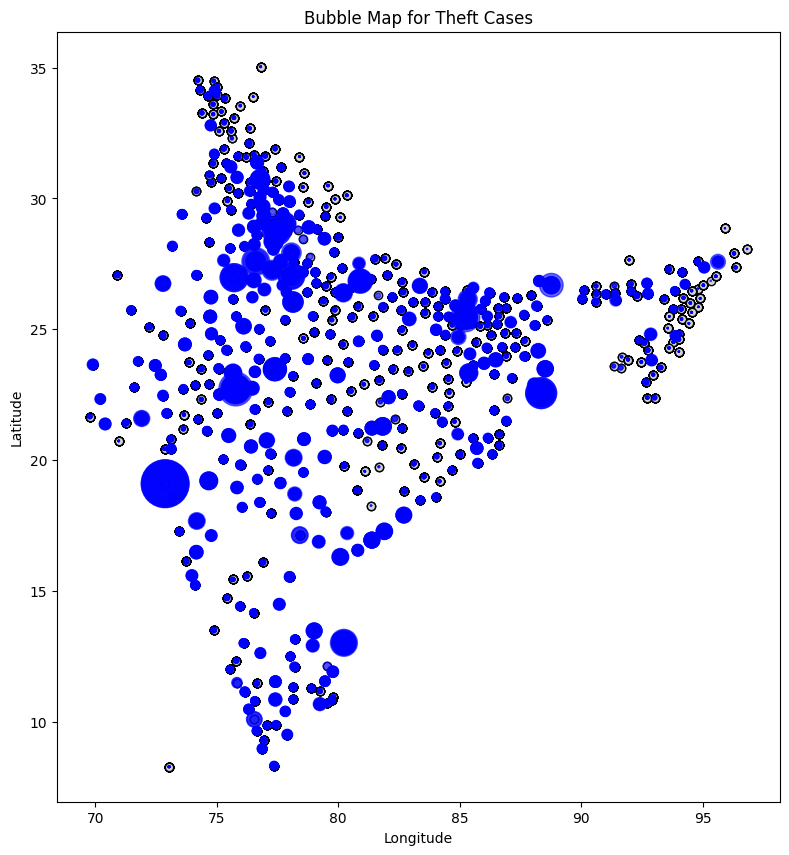

In [24]:
fig, ax = plt.subplots(figsize=(12, 10))
gdf.plot(ax=ax, color='lightgrey', edgecolor='black')
gdf.plot(ax=ax, markersize=gdf['THEFT'] / 10, alpha=0.6, color='blue', legend=True)
plt.title('Bubble Map for Theft Cases')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

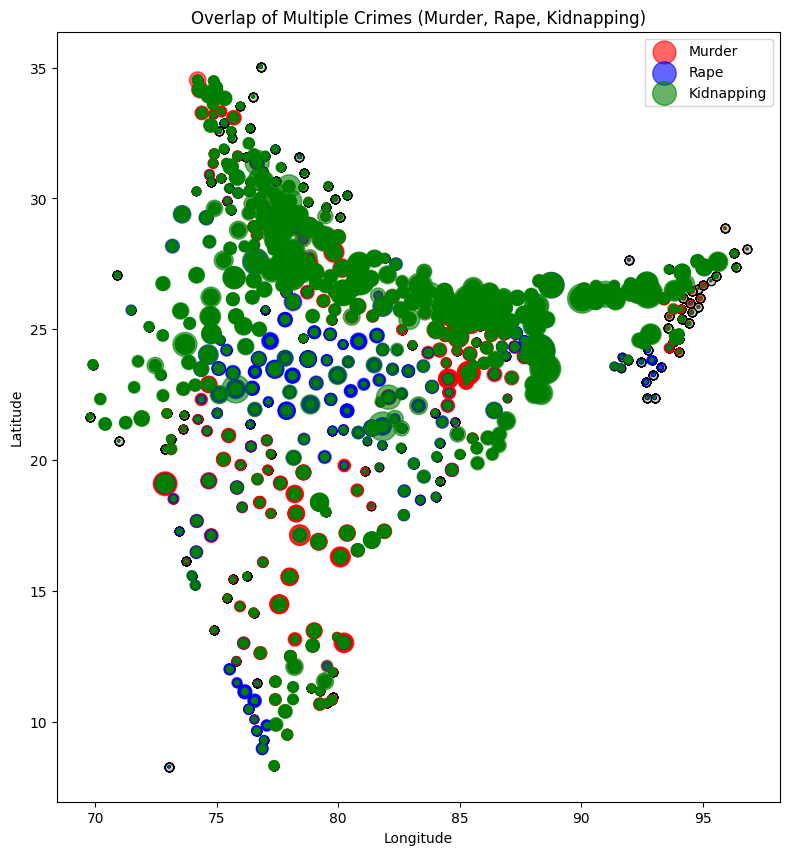

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
gdf.plot(ax=ax, color='lightgrey', edgecolor='black')

# Overlay multiple crimes with alpha blending
gdf.plot(ax=ax, markersize=gdf['MURDER'], color='red', alpha=0.6, label='Murder')
gdf.plot(ax=ax, markersize=gdf['RAPE'], color='blue', alpha=0.6, label='Rape')
gdf.plot(ax=ax, markersize=gdf['KIDNAPPING & ABDUCTION'], color='green', alpha=0.6, label='Kidnapping')

plt.legend()
plt.title('Overlap of Multiple Crimes (Murder, Rape, Kidnapping)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# **Animated Visualization of Crime Trends in India**
This interactive visualization dynamically showcases the increase in crime rates across India over the years. It provides two synchronized views: a geospatial map of crime distribution and a bar chart highlighting the top 10 districts with the highest crime rates for each year.

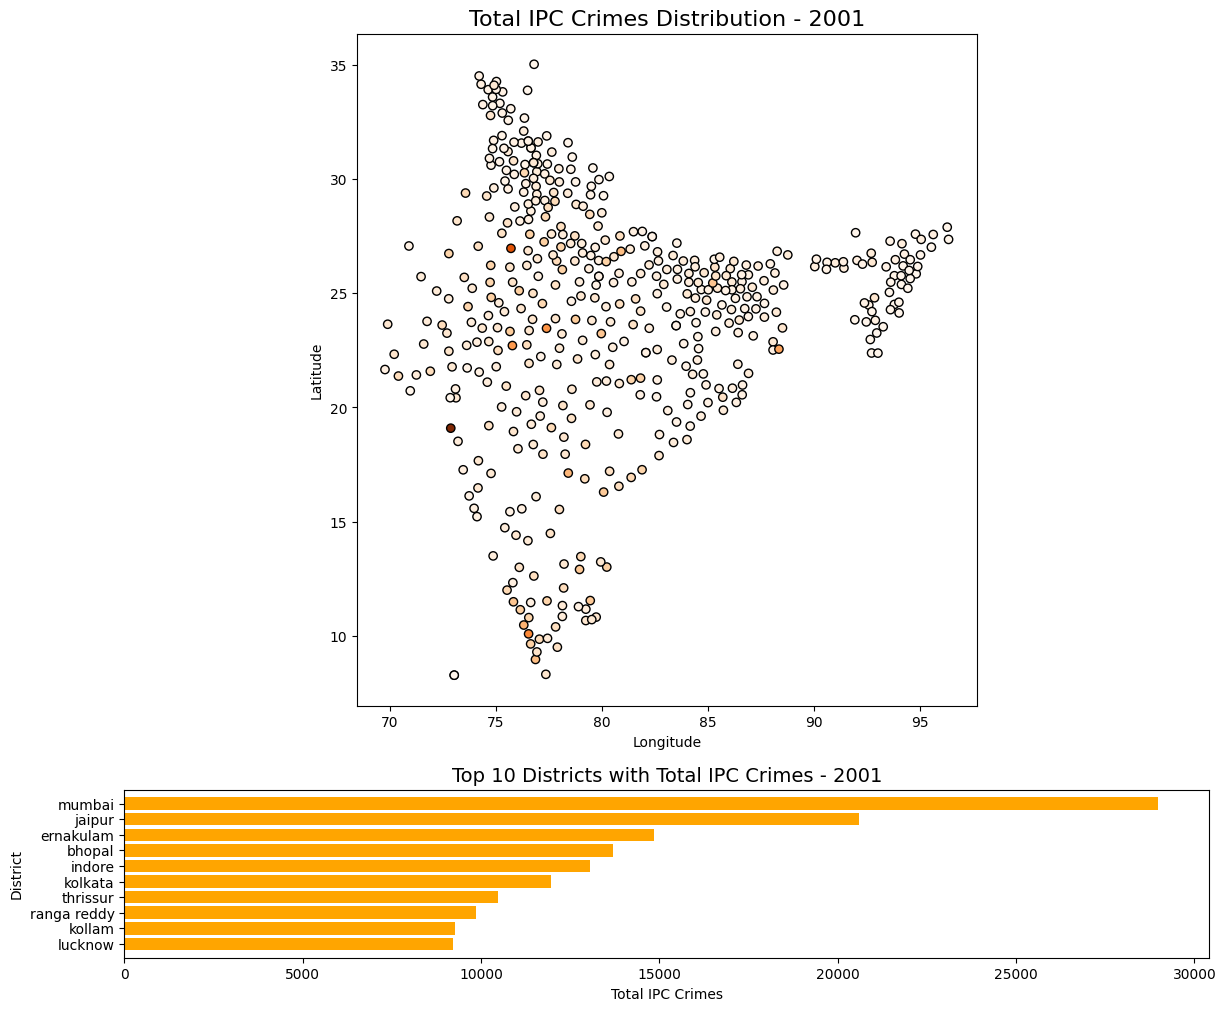

In [26]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.gridspec import GridSpec
from IPython.display import HTML

# Prepare Data (assuming `gdf` contains merged crime and geospatial data)
years = sorted(merged_data['YEAR'].unique())  # Sorted list of years

# Initialize the figure with fixed layout
fig = plt.figure(figsize=(14, 12))
gs = GridSpec(2, 1, height_ratios=[4, 1], figure=fig)  # More space for the map
ax_map = fig.add_subplot(gs[0])
ax_bar = fig.add_subplot(gs[1])

# Update function for animation
def update(year):
    # Clear axes
    ax_map.clear()
    ax_bar.clear()

    # Filter data for the selected year
    yearly_data = gdf[gdf['YEAR'] == year]

    # Map plot without the legend (scale bar)
    yearly_data.plot(column='TOTAL IPC CRIMES',
                     cmap='Oranges',
                     ax=ax_map,
                     edgecolor='black',
                     legend=False)  # Turn off legend here
    ax_map.set_title(f'Total IPC Crimes Distribution - {year}', fontsize=16)
    ax_map.set_xlabel('Longitude')
    ax_map.set_ylabel('Latitude')

    # Bar chart
    top_districts = yearly_data[['DISTRICT', 'TOTAL IPC CRIMES']].sort_values(by='TOTAL IPC CRIMES', ascending=False).head(10)
    ax_bar.barh(top_districts['DISTRICT'], top_districts['TOTAL IPC CRIMES'], color='orange')
    ax_bar.set_title(f'Top 10 Districts with Total IPC Crimes - {year}', fontsize=14)
    ax_bar.set_xlabel('Total IPC Crimes')
    ax_bar.set_ylabel('District')
    ax_bar.invert_yaxis()  # Highest crime at the top

# Create animation
ani = FuncAnimation(fig, update, frames=years, repeat=False)

# Display animation in notebook
HTML(ani.to_jshtml())

# Save the animation as MP4 (optional)
# from matplotlib.animation import FFMpegWriter
# writer = FFMpegWriter(fps=2, metadata=dict(artist='Crime Data Animation'))
# ani.save('crime_map_bar_animation.mp4', writer=writer)

GeoDataFrame Columns: Index(['id', 'district', 'dt_code', 'st_nm', 'st_code', 'year', 'geometry'], dtype='object')
Rows with missing coordinates after merge:
         DISTRICT  latitude  longitude
3        cuddapah       NaN        NaN
4       cyberabad       NaN        NaN
6   guntakal rly.       NaN        NaN
8    guntur urban       NaN        NaN
9  hyderabad city       NaN        NaN
Number of districts with murder cases above 48.77164973391388: 2405


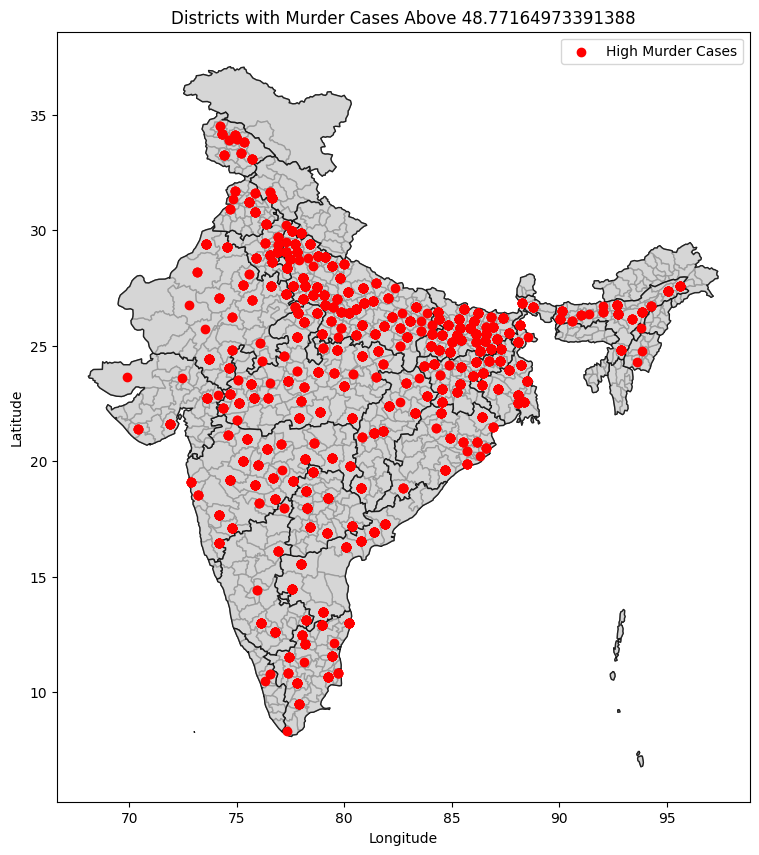

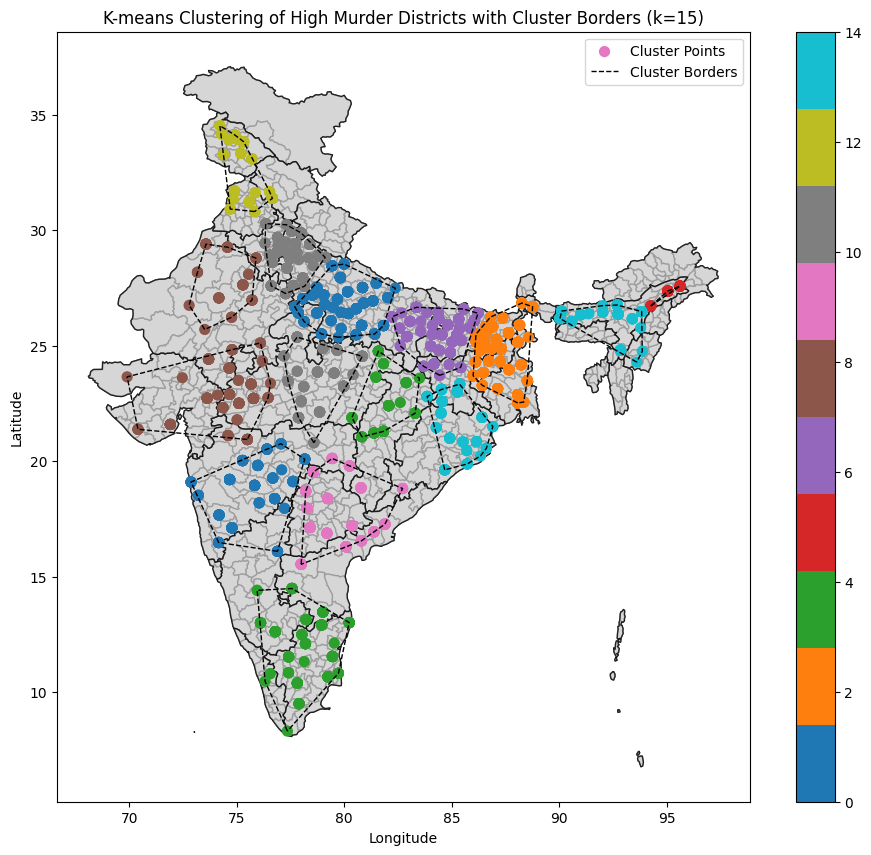

Clustered data saved as 'high_murder_districts_clusters_with_borders.csv'.
Filtered data saved as 'high_murder_districts.csv'.


In [27]:
# code for threshold trial  plus k means plus convex hull

import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

#  1: Load the GeoJSON file as a GeoDataFrame
geojson_path = '/content/drive/My Drive/AIProjectDatabase/india (1).geojson'  # Adjust path if needed
india_geo = gpd.read_file(geojson_path)

# Inspect the loaded GeoDataFrame structure
print("GeoDataFrame Columns:", india_geo.columns)

# Extract the latitude and longitude from the geometry
india_geo['latitude'] = india_geo.geometry.centroid.y
india_geo['longitude'] = india_geo.geometry.centroid.x

# Extract relevant columns for merging (adjust based on your crime data)
geo_coordinates = india_geo[['district', 'latitude', 'longitude']]

#  2: Load the crime dataset
crime_data_path = '/content/drive/My Drive/AIProjectDatabase/crimes_cleaned.csv'  # Adjust path if needed
crime_data = pd.read_csv(crime_data_path)

# Ensure district names match by cleaning up whitespace and cases
crime_data['DISTRICT'] = crime_data['DISTRICT'].str.strip().str.lower()
geo_coordinates['district'] = geo_coordinates['district'].str.strip().str.lower()

#  3: Merge crime data with geo coordinates on district names
merged_data = crime_data.merge(geo_coordinates, left_on='DISTRICT', right_on='district', how='left')

# Check for any rows with missing latitude or longitude
missing_coords = merged_data[merged_data[['latitude', 'longitude']].isnull().any(axis=1)]
print("Rows with missing coordinates after merge:")
print(missing_coords[['DISTRICT', 'latitude', 'longitude']].head())

# Drop rows with missing coordinates (if any)
merged_data = merged_data.dropna(subset=['latitude', 'longitude'])

#  4: Filter districts with murder cases above a threshold
#murder_threshold = 100 # Set your threshold here

murder_mean = merged_data['MURDER'].mean()
murder_threshold=murder_mean
high_murder_data = merged_data[merged_data['MURDER'] > murder_threshold]

print(f"Number of districts with murder cases above {murder_threshold}: {len(high_murder_data)}")

#  5: Convert to GeoDataFrame for visualization
gdf_high_murder = gpd.GeoDataFrame(
    high_murder_data,
    geometry=gpd.points_from_xy(high_murder_data.longitude, high_murder_data.latitude),
    crs="EPSG:4326"
)

#  6: Plot the districts with high murder cases
fig, ax = plt.subplots(figsize=(12, 10))
india_geo.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.7)
gdf_high_murder.plot(ax=ax, color='red', marker='o', label='High Murder Cases')
plt.title(f'Districts with Murder Cases Above {murder_threshold}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

from sklearn.cluster import KMeans
from shapely.geometry import MultiPoint

#  7: Prepare data for K-means clustering
coordinates = high_murder_data[['latitude', 'longitude']]

# Perform K-means clustering
kmeans = KMeans(n_clusters=15, random_state=42)
high_murder_data['cluster'] = kmeans.fit_predict(coordinates)

#  8: Convert the clustered data to a GeoDataFrame
gdf_clusters = gpd.GeoDataFrame(
    high_murder_data,
    geometry=gpd.points_from_xy(high_murder_data.longitude, high_murder_data.latitude),
    crs="EPSG:4326"
)

#  9: Create polygons (convex hulls) for each cluster
cluster_polygons = []
for cluster_id in sorted(high_murder_data['cluster'].unique()):
    cluster_points = gdf_clusters[gdf_clusters['cluster'] == cluster_id].geometry
    if len(cluster_points) >= 3:  # Convex hull requires at least 3 points
        cluster_polygons.append({
            'cluster': cluster_id,
            'geometry': MultiPoint([point.coords[0] for point in cluster_points]).convex_hull
        })

# Convert cluster polygons to a GeoDataFrame
gdf_cluster_polygons = gpd.GeoDataFrame(cluster_polygons, crs="EPSG:4326")

#  10: Visualize the clustered districts with borders
fig, ax = plt.subplots(figsize=(12, 10))
india_geo.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.7)
gdf_clusters.plot(ax=ax, column='cluster', cmap='tab10', legend=True, markersize=50, label='Cluster Points')
gdf_cluster_polygons.boundary.plot(ax=ax, color='black', linestyle='--', linewidth=1, label='Cluster Borders')
plt.title('K-means Clustering of High Murder Districts with Cluster Borders (k=15)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

# Save the clustered data
clustered_output_path = 'high_murder_districts_clusters_with_borders.csv'
high_murder_data.to_csv(clustered_output_path, index=False)
print(f"Clustered data saved as '{clustered_output_path}'.")



# Save the filtered data for high murder districts
output_path = 'high_murder_districts.csv'
high_murder_data.to_csv(output_path, index=False)
print(f"Filtered data saved as '{output_path}'.")

# Phase-6: ML Models

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error, r2_score, classification_report
import matplotlib.pyplot as plt
# Load the dataset
file_path = '/content/drive/My Drive/AIProjectDatabase/crimes_cleaned.csv'  # Upload this CSV file to Colab or provide the correct path
data = pd.read_csv(file_path)

# Display the first few rows to inspect the data
data.head()

STATE/UT   DISTRICT  YEAR  MURDER  ATTEMPT TO MURDER  \
0  ANDHRA PRADESH   ADILABAD  2013      96                 72   
1  ANDHRA PRADESH  ANANTAPUR  2013     156                149   
2  ANDHRA PRADESH   CHITTOOR  2013      72                 61   
3  ANDHRA PRADESH   CUDDAPAH  2013      93                107   
4  ANDHRA PRADESH  CYBERABAD  2013     162                123   

   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
0                                         13    61               0   
1                                          3    28               0   
2                                          2    31               0   
3                                          7    19               0   
4                                         16   138               0   

   OTHER RAPE  KIDNAPPING & ABDUCTION  \
0          61                      65   
1          28                     110   
2          31                      52   
3          19                      84   
4         138                     192   

   KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS  \
0                                           47   
1                                           84   
2                                           27   
3                                           50   
4                                          129   

   KIDNAPPING AND ABDUCTION OF OTHERS  DACOITY  \
0                                  18        2   
1                                  26        5   
2                                  25        3   
3                                  34        2   
4                                  63       15   

   PREPARATION AND ASSEMBLY FOR DACOITY  ROBBERY  BURGLARY  THEFT  AUTO THEFT  \
0                                     0       14       274    377          86   
1                                     0       23       279    597         154   
2                                     0       11       157    512         158   
3                                     0        9       220    702         255   
4                                     0       89      1318   4779        1761   

   OTHER THEFT  RIOTS  CRIMINAL BREACH OF TRUST  CHEATING  COUNTERFIETING  \
0          291     58                        93       254               1   
1          443     56                         5       160               5   
2          354     57                        17       238               6   
3          447    156                        81       317               5   
4         3018     34                       179      2111              12   

   ARSON  HURT/GREVIOUS HURT  DOWRY DEATHS  \
0     30                2394            12   
1     29                2537            23   
2     18                 937            13   
3     34                2310             9   
4     40                4284            43   

   ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
0                                                197     
1                                                337     
2                                                119     
3                                                318     
4                                                350     

   INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
0                         138                                  464   
1                          43                                  161   
2                          84                                  435   
3                         163                                  207   
4                         338                                 1526   

   IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES  CAUSING DEATH BY NEGLIGENCE  \
0                                            0                          376   
1                                            0                          573   
2                                            0                          546   
3                                  

In [30]:
# Drop non-numeric columns like STATE/UT and DISTRICT, if these are not needed
data = data.drop(columns=['STATE/UT', 'DISTRICT'])

# Check for missing values
data.isnull().sum()

# Fill or drop missing values if necessary
# data = data.fillna(data.mean())  # or data.dropna()

# Splitting data into features (X) and target variable (y)
# For this example, let's predict 'TOTAL IPC CRIMES' as the target
X = data.drop(columns=['TOTAL IPC CRIMES'])
y = data['TOTAL IPC CRIMES']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Linear Regression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Predictions
y_pred_lr = linear_regressor.predict(X_test)

# Evaluation
print("Linear Regression R2 Score:", r2_score(y_test, y_pred_lr))
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lr))

Linear Regression R2 Score: 0.9999999999991817
Linear Regression MSE: 1.1713681407303513e-05


In [33]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

models = {
    'KNN': KNeighborsRegressor(),

    'Gradient Boosting': GradientBoostingRegressor(),

}

# Train and evaluate each model
results = {}

for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the results
    results[model_name] = {'MSE': mse, 'R2': r2}

# Print out the results
for model_name, metrics in results.items():
    print(f"{model_name}: MSE = {metrics['MSE']:.4f}, R2 = {metrics['R2']:.4f}")

KNN: MSE = 98954.7042, R2 = 0.9931
Gradient Boosting: MSE = 59796.6148, R2 = 0.9958


# *AIM-1: PREDICTING THE TOTAL NUMBER OF CRIMES BASED ON ALL FEATURES*

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, classification_report
import matplotlib.pyplot as plt
file_path= '/content/drive/My Drive/AIProjectDatabase/crimes_cleaned.csv'
data = pd.read_csv(file_path)

# Display the first few rows to inspect the data
data.head()

STATE/UT   DISTRICT  YEAR  MURDER  ATTEMPT TO MURDER  \
0  ANDHRA PRADESH   ADILABAD  2013      96                 72   
1  ANDHRA PRADESH  ANANTAPUR  2013     156                149   
2  ANDHRA PRADESH   CHITTOOR  2013      72                 61   
3  ANDHRA PRADESH   CUDDAPAH  2013      93                107   
4  ANDHRA PRADESH  CYBERABAD  2013     162                123   

   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
0                                         13    61               0   
1                                          3    28               0   
2                                          2    31               0   
3                                          7    19               0   
4                                         16   138               0   

   OTHER RAPE  KIDNAPPING & ABDUCTION  \
0          61                      65   
1          28                     110   
2          31                      52   
3          19                      84   
4         138                     192   

   KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS  \
0                                           47   
1                                           84   
2                                           27   
3                                           50   
4                                          129   

   KIDNAPPING AND ABDUCTION OF OTHERS  DACOITY  \
0                                  18        2   
1                                  26        5   
2                                  25        3   
3                                  34        2   
4                                  63       15   

   PREPARATION AND ASSEMBLY FOR DACOITY  ROBBERY  BURGLARY  THEFT  AUTO THEFT  \
0                                     0       14       274    377          86   
1                                     0       23       279    597         154   
2                                     0       11       157    512         158   
3                                     0        9       220    702         255   
4                                     0       89      1318   4779        1761   

   OTHER THEFT  RIOTS  CRIMINAL BREACH OF TRUST  CHEATING  COUNTERFIETING  \
0          291     58                        93       254               1   
1          443     56                         5       160               5   
2          354     57                        17       238               6   
3          447    156                        81       317               5   
4         3018     34                       179      2111              12   

   ARSON  HURT/GREVIOUS HURT  DOWRY DEATHS  \
0     30                2394            12   
1     29                2537            23   
2     18                 937            13   
3     34                2310             9   
4     40                4284            43   

   ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
0                                                197     
1                                                337     
2                                                119     
3                                                318     
4                                                350     

   INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
0                         138                                  464   
1                          43                                  161   
2                          84                                  435   
3                         163                                  207   
4                         338                                 1526   

   IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES  CAUSING DEATH BY NEGLIGENCE  \
0                                            0                          376   
1                                            0                          573   
2                                            0                          546   
3                                  

In [36]:
# Drop non-numeric columns like STATE/UT and DISTRICT, if these are not needed
data = data.drop(columns=['STATE/UT', 'DISTRICT'])

# Check for missing values
data.isnull().sum()


# For this example, let's predict 'TOTAL IPC CRIMES' as the target
X = data.drop(columns=['TOTAL IPC CRIMES'])
y = data['TOTAL IPC CRIMES']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Linear Regression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Predictions
y_pred_lr = linear_regressor.predict(X_test)

# Evaluation
print("Linear Regression R2 Score:", r2_score(y_test, y_pred_lr))
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lr))

Linear Regression R2 Score: 0.9999999999991817
Linear Regression MSE: 1.1713681407303513e-05


# *AIM-2: PREDICTING THE TOTAL NUMBER OF CRIMES USING TOP 5 FEATURES*

In [38]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv('/content/drive/My Drive/AIProjectDatabase/crimes_cleaned.csv')


label_encoder = LabelEncoder()
df['STATE/UT'] = label_encoder.fit_transform(df['STATE/UT'])
df['DISTRICT'] = label_encoder.fit_transform(df['DISTRICT'])

#  3: Calculate the variance-covariance matrix between features
# Exclude the target column `TOTAL IPC CRIMES` and categorical columns like 'STATE/UT', 'DISTRICT'
features = df.drop(columns=['TOTAL IPC CRIMES', 'STATE/UT', 'DISTRICT'])
cov_matrix = features.cov()

# Calculate covariance of each feature with the target variable
cov_with_target = df.cov()['TOTAL IPC CRIMES'].drop(['TOTAL IPC CRIMES', 'STATE/UT', 'DISTRICT'])

# Select the top 5 features with the highest covariance (absolute value) with the target variable
top_5_features = cov_with_target.abs().sort_values(ascending=False).head(5).index
print("\nTop 5 Features based on Covariance with Target:")
print(top_5_features)

#  4: Split the dataset using the selected features
X = df[top_5_features]
y = df['TOTAL IPC CRIMES']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  5: Train and evaluate models
models = {
    'Linear Regression': LinearRegression(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {model_name}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R²: {r2}")


Top 5 Features based on Covariance with Target:
Index(['OTHER IPC CRIMES', 'THEFT', 'OTHER THEFT', 'AUTO THEFT',
       'HURT/GREVIOUS HURT'],
      dtype='object')

Training Linear Regression...
Model: Linear Regression
Mean Squared Error (MSE): 190673.6910986067
R²: 0.9866794599801313

Training K-Nearest Neighbors...
Model: K-Nearest Neighbors
Mean Squared Error (MSE): 157902.23678723403
R²: 0.9889688868336671

Training Gradient Boosting...
Model: Gradient Boosting
Mean Squared Error (MSE): 161932.86414667498
R²: 0.9886873056006336


# *AIM-3: CATEGORIZING DISTRICTS BASED ON CRIME DATA*

         STATE/UT   DISTRICT  YEAR  MURDER  ATTEMPT TO MURDER  \
0  ANDHRA PRADESH   ADILABAD  2013      96                 72   
1  ANDHRA PRADESH  ANANTAPUR  2013     156                149   
2  ANDHRA PRADESH   CHITTOOR  2013      72                 61   
3  ANDHRA PRADESH   CUDDAPAH  2013      93                107   
4  ANDHRA PRADESH  CYBERABAD  2013     162                123   

   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
0                                         13    61               0   
1                                          3    28               0   
2                                          2    31               0   
3                                          7    19               0   
4                                         16   138               0   

   OTHER RAPE  KIDNAPPING & ABDUCTION  \
0          61                      65   
1          28                     110   
2          31                      52   
3          19           

<Figure size 1200x800 with 0 Axes>

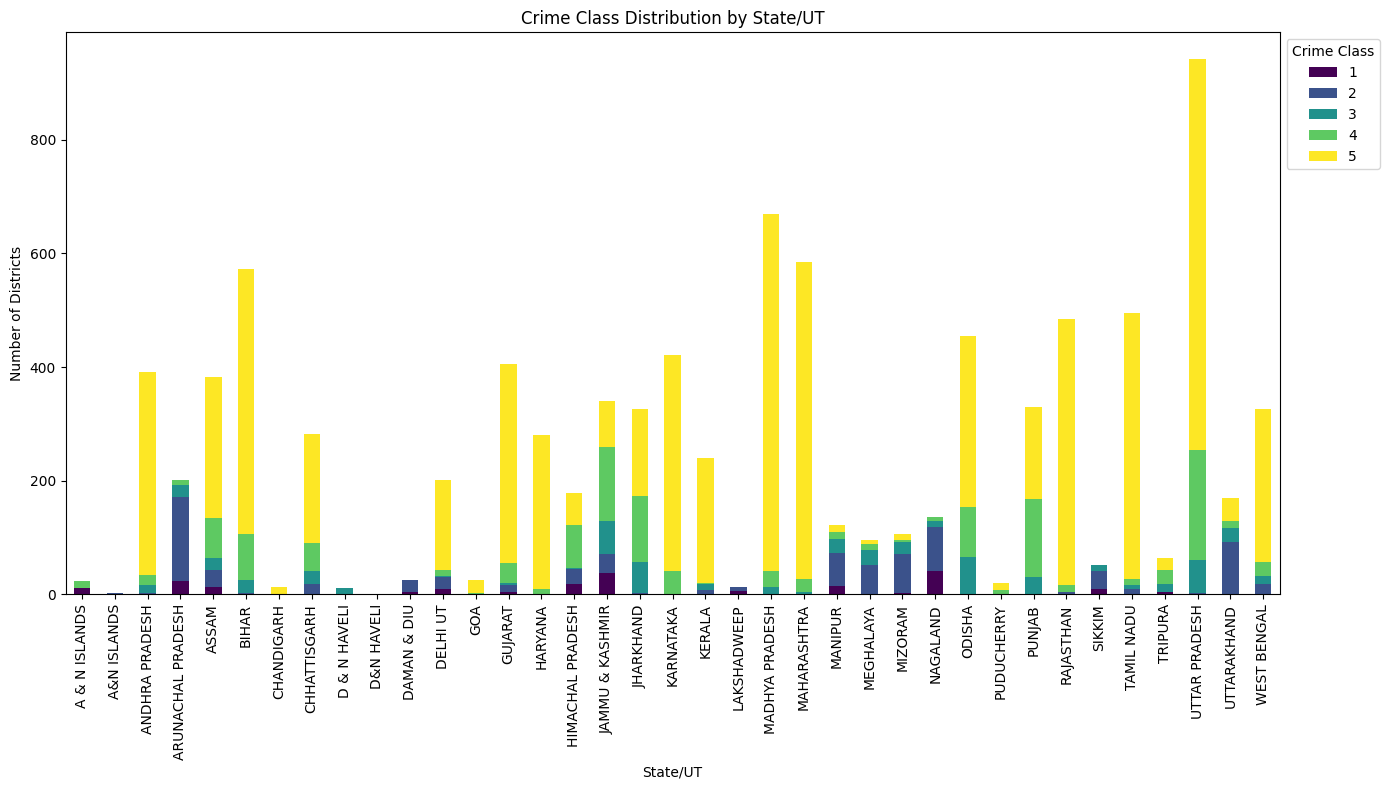

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

# Load the dataset
data = pd.read_csv("/content/drive/My Drive/AIProjectDatabase/crimes_cleaned.csv")

# Check the first few rows
print(data.head())

# Data Preprocessing
# Convert 'YEAR' to categorical (it is not useful as a numeric feature for this task)
data['YEAR'] = data['YEAR'].astype(str)

# Handle missing values (if any)
data.fillna(0, inplace=True)

# Create a new feature 'TOTAL_CRIMES' by summing crime-related columns
crime_columns = ['MURDER', 'ATTEMPT TO MURDER', 'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE',
                 'CUSTODIAL RAPE', 'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
                 'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS', 'KIDNAPPING AND ABDUCTION OF OTHERS',
                 'DACOITY', 'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
                 'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST', 'CHEATING',
                 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT', 'DOWRY DEATHS',
                 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
                 'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
                 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES', 'CAUSING DEATH BY NEGLIGENCE',
                 'OTHER IPC CRIMES']

data['TOTAL_CRIMES'] = data[crime_columns].sum(axis=1)

# Label the districts into 5 crime classes based on the 'TOTAL_CRIMES'
crime_bins = [0, 50, 300, 600, 1200, np.inf]  # Define the ranges for crime classes
crime_labels = [1, 2, 3, 4, 5]  # The labels for the five crime classes

# Apply the binning process
data['CRIME_LABEL'] = pd.cut(data['TOTAL_CRIMES'], bins=crime_bins, labels=crime_labels)

# Check if there are any NaN values in CRIME_LABEL
print(f"Missing values in 'CRIME_LABEL': {data['CRIME_LABEL'].isnull().sum()}")

# If there are NaN values in CRIME_LABEL, fill them with the most common crime label (or any default value)
data['CRIME_LABEL'].fillna(data['CRIME_LABEL'].mode()[0], inplace=True)

# Now, encode categorical columns ('State/UT' and 'District') using One-Hot Encoding
data_encoded = pd.get_dummies(data, columns=['STATE/UT', 'DISTRICT'], drop_first=True)

# Feature selection (excluding 'CRIME_LABEL', 'YEAR' for simplicity)
X = data_encoded.drop(columns=['CRIME_LABEL', 'YEAR', 'TOTAL_CRIMES'])
y = data_encoded['CRIME_LABEL']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling (optional but often recommended for better model performance)
scaler = StandardScaler()

# Fit the scaler to the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Cross-validation (optional)
cv_scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-validation accuracy: {cv_scores.mean() * 100:.2f}%")

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_importance)

# Visualizing Crime Class Distribution by State
state_crime_class = data.groupby(['STATE/UT', 'CRIME_LABEL']).size().unstack(fill_value=0)

# Plotting the crime class distribution by state
plt.figure(figsize=(12, 8))
state_crime_class.plot(kind='bar', stacked=True, colormap='viridis', figsize=(14, 8))
plt.title('Crime Class Distribution by State/UT')
plt.xlabel('State/UT')
plt.ylabel('Number of Districts')
plt.legend(title='Crime Class', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

# *PHASE-7: CRIME TREND PREDICTIONS USING ARIMA AND VAR MODELS*

In [42]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('/content/drive/My Drive/AIProjectDatabase/crimes_cleaned.csv')

# Create backup columns to store the original 'STATE/UT' and 'DISTRICT' values
data['STATE/UT_original'] = data['STATE/UT']
data['DISTRICT_original'] = data['DISTRICT']



# Initialize the label encoder to convert categorical data into numeric labels
label_encoder = LabelEncoder()

# Encode 'STATE/UT' and 'DISTRICT' columns with numeric labels
data['STATE/UT'] = label_encoder.fit_transform(data['STATE/UT'])
data['DISTRICT'] = label_encoder.fit_transform(data['DISTRICT'])

# Configure pandas to display all rows (avoids truncation of output)
pd.set_option('display.max_rows', None)

# Print the comparison of original and encoded values for 'STATE/UT' and 'DISTRICT'
print("Original vs. Encoded Values for STATE/UT and DISTRICT:")
print(data[['STATE/UT_original', 'STATE/UT', 'DISTRICT_original', 'DISTRICT']])

# Reset the display options to default (useful after the operation)
pd.reset_option('display.max_rows')

Original vs. Encoded Values for STATE/UT and DISTRICT:
      STATE/UT_original  STATE/UT     DISTRICT_original  DISTRICT
0        ANDHRA PRADESH         2              ADILABAD         3
1        ANDHRA PRADESH         2             ANANTAPUR        31
2        ANDHRA PRADESH         2              CHITTOOR       157
3        ANDHRA PRADESH         2              CUDDAPAH       175
4        ANDHRA PRADESH         2             CYBERABAD       177
5        ANDHRA PRADESH         2         EAST GODAVARI       225
6        ANDHRA PRADESH         2         GUNTAKAL RLY.       284
7        ANDHRA PRADESH         2                GUNTUR       285
8        ANDHRA PRADESH         2          GUNTUR URBAN       286
9        ANDHRA PRADESH         2        HYDERABAD CITY       313
10       ANDHRA PRADESH         2            KARIMNAGAR       398
11       ANDHRA PRADESH         2               KHAMMAM       412
12       ANDHRA PRADESH         2               KRISHNA       452
13       ANDHRA PRADE

# **Customizing Predictions for a Specific State**

*When we select a code from the list of states provided and edit it in the code. The ARIMA model will generate predictions for the chosen state, displaying the forecasted crime trends for the years 2014 to 2023. This customization allows you to focus on the state of your interest, providing localized insights into crime trends*

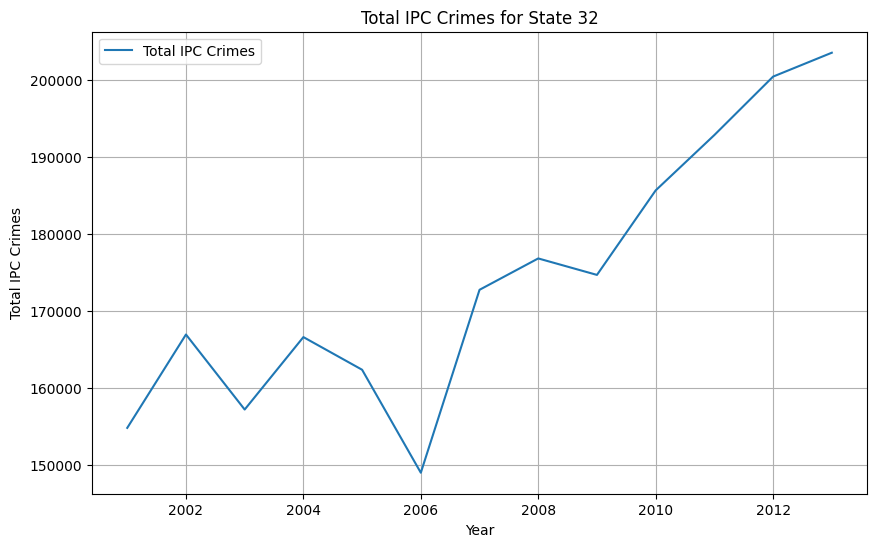

ADF Statistic: 0.9160292436081247
p-value: 0.99329598702057
Data is non-stationary. Differencing will be applied.
ADF Statistic (Differenced): -5.786614179507858
p-value (Differenced): 4.982343009504034e-07


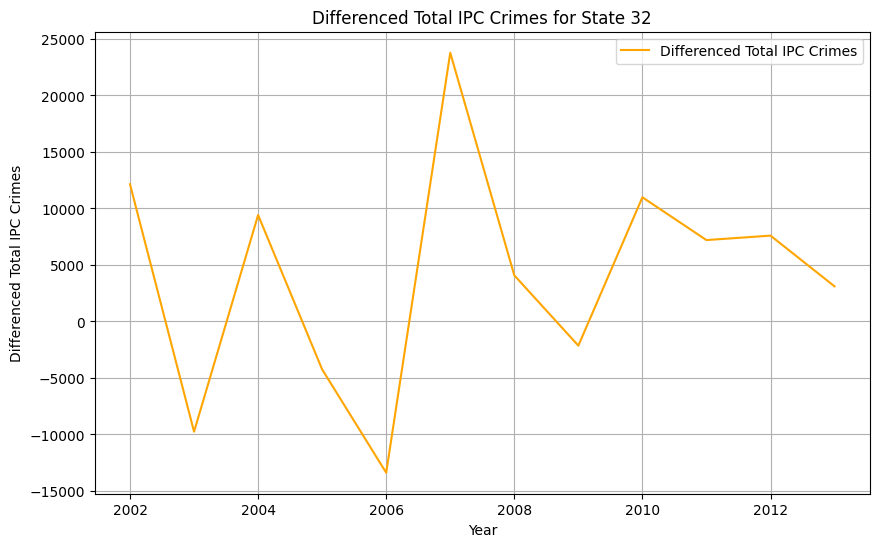

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

                               SARIMAX Results                                
Dep. Variable:       TOTAL IPC CRIMES   No. Observations:                   12
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -126.137
Date:                Sun, 09 Mar 2025   AIC                            260.275
Time:                        18:00:10   BIC                            262.214
Sample:                             0   HQIC                           259.557
                                 - 12                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4064.8324   2431.654      1.672      0.095    -701.122    8830.787
ar.L1          0.0485      1.684      0.029      0.977      -3.251       3.348
ma.L1         -0.5286      1.579     -0.335      0.7

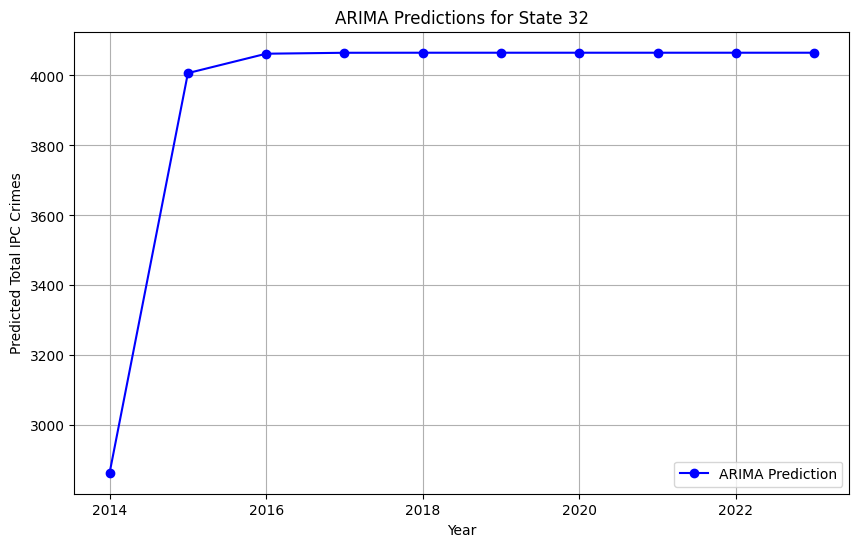

In [43]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import pandas as pd

# Select the state and prepare the data
state_selected = 32  # Plug in the STATE code from the above list to get the predictions

arima_data = data[data['STATE/UT'] == state_selected].groupby('YEAR')['TOTAL IPC CRIMES'].sum()

# Plot the original data
plt.figure(figsize=(10, 6))
plt.plot(arima_data, label='Total IPC Crimes')
plt.title(f"Total IPC Crimes for State {state_selected}")
plt.xlabel('Year')
plt.ylabel('Total IPC Crimes')
plt.grid(True)
plt.legend()
plt.show()

# Perform Augmented Dickey-Fuller (ADF) test to check for stationarity
adf_test = adfuller(arima_data)
print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")

# Check if the data is stationary
if adf_test[1] > 0.05:
    print("Data is non-stationary. Differencing will be applied.")

    # First differencing
    arima_data_diff = arima_data.diff().dropna()  # First differencing

    # Check stationarity again after differencing
    adf_test_diff = adfuller(arima_data_diff)
    print(f"ADF Statistic (Differenced): {adf_test_diff[0]}")
    print(f"p-value (Differenced): {adf_test_diff[1]}")

    if adf_test_diff[1] > 0.05:
        print("Still non-stationary after differencing. Further differencing required.")
        # Second differencing if still non-stationary
        arima_data_diff = arima_data_diff.diff().dropna()
else:
    print("Data is already stationary.")

# Plot the differenced data
plt.figure(figsize=(10, 6))
plt.plot(arima_data_diff, label='Differenced Total IPC Crimes', color='orange')
plt.title(f"Differenced Total IPC Crimes for State {state_selected}")
plt.xlabel('Year')
plt.ylabel('Differenced Total IPC Crimes')
plt.grid(True)
plt.legend()
plt.show()



model = sm.tsa.ARIMA(arima_data_diff, order=(1, 0, 1))  # Adjusted for differenced data
model_fit = model.fit()

# Print the summary of the ARIMA model
print(model_fit.summary())

# Make predictions
start_year = arima_data.index[-1] + 1  # The year after the last data point
arima_pred = model_fit.forecast(steps=10)  # Forecasting for the next 10 years
predicted_years = list(range(start_year, start_year + len(arima_pred)))

# Create a DataFrame to store the predictions
prediction_df = pd.DataFrame({
    'Year': predicted_years,
    'Prediction': arima_pred
})

# Print predictions
print(f"ARIMA Predictions for State {state_selected}:")
print(prediction_df)

# Plotting the predictions
plt.figure(figsize=(10, 6))
plt.plot(prediction_df['Year'], prediction_df['Prediction'], marker='o', color='b', linestyle='-', label='ARIMA Prediction')
plt.title(f"ARIMA Predictions for State {state_selected}")
plt.xlabel('Year')
plt.ylabel('Predicted Total IPC Crimes')
plt.grid(True)
plt.legend()
plt.show()

# Ensure the correct index length when saving to CSV
# The differenced data will have one fewer entry, so adjust for that
corrected_data = pd.DataFrame({
    'Year': arima_data.index[1:],  # Adjust to match the length of differenced data
    'Differenced Total IPC Crimes': arima_data_diff
})

# Save the differenced data and predictions to a CSV file
corrected_data.to_csv('corrected_data.csv', index=False)

# Save predictions to CSV
prediction_df.to_csv('arima_predictions.csv', index=False)

# Crime Trend Estimation Using VAR Model
We implement the VAR (Vector AutoRegression) model for estimating crime trends. The VAR model is a powerful statistical tool that captures the interdependencies among multiple time series. It allows us to analyze how different types of crimes influence one another over time.

You can run this code directly and then type the name of the state in capital letters with the correct spelling to generate predictions. This provides a user-friendly way to explore crime trends for your state of interest, offering deeper insights into the dynamics of crime patterns.

Enter the state for which you want to make predictions: WEST BENGAL


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)



Predicted Crime Data for WEST BENGAL (2014-2023):
           MURDER  ATTEMPT TO MURDER  \
2014  1924.403698        3494.756869   
2015  2101.801721        2653.761203   
2016  1805.787845        1706.949750   
2017  1792.154555         855.352946   
2018  2558.976629        1559.982291   
2019  3093.773533        4246.605047   
2020  4728.463662        6712.426010   
2021  5758.715039        7951.171029   
2022  5267.407771        8069.810811   
2023  5163.102702        8092.567500   

      CULPABLE HOMICIDE NOT AMOUNTING TO MURDER         RAPE  CUSTODIAL RAPE  \
2014                                 780.490618  2208.664479             0.0   
2015                                 794.705809  3455.936955             0.0   
2016                                 543.575418  4574.696903             0.0   
2017                                 541.534878  5547.168963             0.0   
2018                                  44.780544  6101.432230             0.0   
2019                        

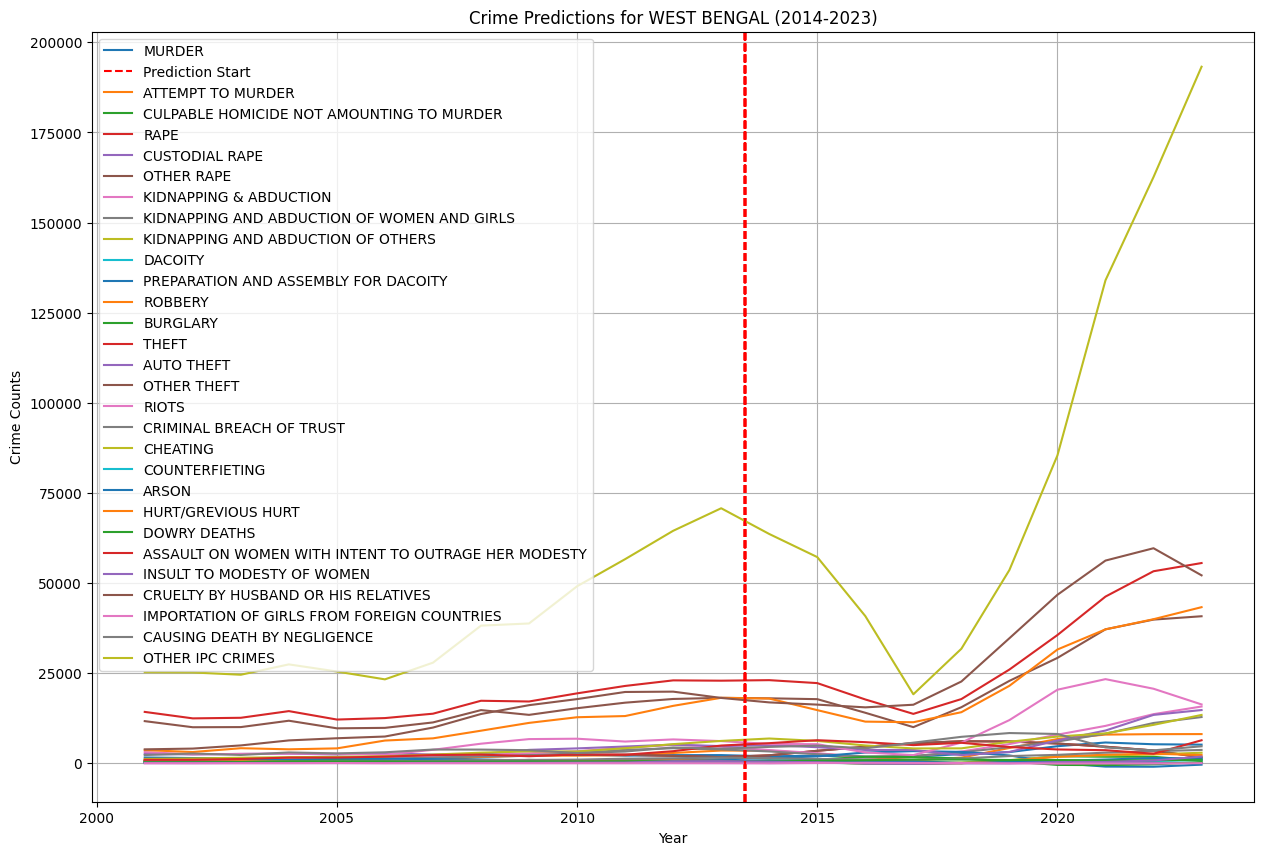

In [44]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR


file_path = '/content/drive/My Drive/AIProjectDatabase/crimes_cleaned.csv'  # Path to the cleaned dataset
data = pd.read_csv(file_path)

# Input: Ask the user to select a state for prediction
selected_state = input("Enter the state for which you want to make predictions: ").strip()

# Filter the dataset for the chosen state
state_data = data[data['STATE/UT'] == selected_state]

# Check if data exists for the selected state
if state_data.empty:
    print(f"No data found for the state '{selected_state}'. Please check the input.")
else:
    # Group data by year and aggregate numerical values
    data_aggregated = state_data.groupby('YEAR').sum(numeric_only=True)

    # Define the columns to use for crime trend prediction
    features = [
        'MURDER', 'ATTEMPT TO MURDER', 'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER',
        'RAPE', 'CUSTODIAL RAPE', 'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
        'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS', 'KIDNAPPING AND ABDUCTION OF OTHERS',
        'DACOITY', 'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY',
        'THEFT', 'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
        'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT', 'DOWRY DEATHS',
        'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY', 'INSULT TO MODESTY OF WOMEN',
        'CRUELTY BY HUSBAND OR HIS RELATIVES', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
        'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES'
    ]

    # Extract training data for the years 2001 to 2013
    train_data = data_aggregated.loc[2001:2013, features]

    # Ensure sufficient training data is available
    if train_data.empty:
        print("Insufficient data for training. Please ensure data from 2001 to 2013 is available.")
    else:
        # Fit a Vector Autoregression (VAR) model
        model = VAR(train_data)
        results = model.fit(maxlags=1)  # Use 1 lag, adjust based on dataset characteristics

        # Generate predictions for the years 2014 to 2023
        forecast = results.forecast(train_data.values, steps=10)
        forecast_df = pd.DataFrame(forecast, index=range(2014, 2024), columns=features)

        # Display the forecasted crime data
        print(f"\nPredicted Crime Data for {selected_state} (2014-2023):")
        print(forecast_df)

        # Combine actual data (up to 2013) with forecasted data (2014 onwards) for visualization
        actual_and_forecast = pd.concat([data_aggregated[features], forecast_df])

        # Visualize the trends using a line plot
        plt.figure(figsize=(15, 10))
        for column in features:
            plt.plot(actual_and_forecast.index, actual_and_forecast[column], label=column)
            # Highlight the prediction period
            plt.axvline(x=2013.5, color='red', linestyle='--', label='Prediction Start' if column == features[0] else None)

        # Add titles, labels, and legend to the plot
        plt.title(f'Crime Predictions for {selected_state} (2014-2023)')
        plt.xlabel('Year')
        plt.ylabel('Crime Counts')
        plt.legend(loc='upper left')
        plt.grid(True)

        # Show the plot
        plt.show()

# National Crime Trend Analysis Using VAR
We apply the VAR (Vector AutoRegression) model to analyze crime trends across the entire country of India. By aggregating data for all types of crimes, this approach provides a comprehensive view of how crime patterns have evolved nationally.

The VAR model enables us to capture the interplay between various crime categories over time, offering valuable insights into the overall trend of criminal activities in India. This analysis helps us understand broader patterns and can inform nationwide policy and intervention strategies.

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9397 entries, 0 to 9396
Data columns (total 33 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             9397 non-null   object
 1   DISTRICT                                             9397 non-null   object
 2   YEAR                                                 9397 non-null   int64 
 3   MURDER                                               9397 non-null   int64 
 4   ATTEMPT TO MURDER                                    9397 non-null   int64 
 5   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER            9397 non-null   int64 
 6   RAPE                                                 9397 non-null   int64 
 7   CUSTODIAL RAPE                                       9397 non-null   int64 
 8   OTHER RAPE                                           9397

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


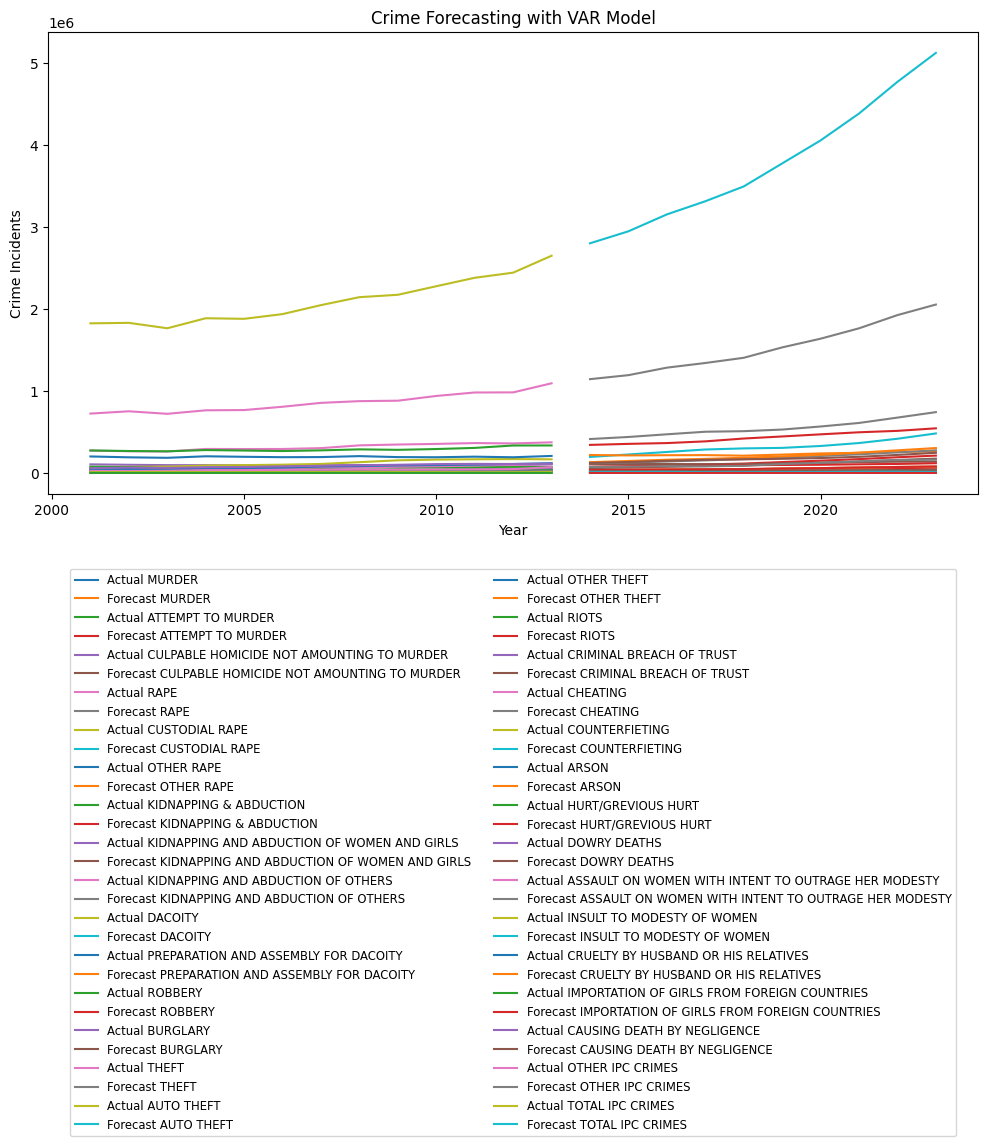


Forecasted Crime Data for 2014-2023:
         MURDER  ATTEMPT TO MURDER  CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  \
0  33804.335214       36803.854117                                3606.239885   
1  33824.342240       38563.741116                                3679.917894   
2  34026.509056       39150.434859                                3657.732417   
3  36177.006608       42138.476249                                3676.719200   
4  36709.765597       46362.001457                                3458.387962   
5  36380.378984       49283.306098                                3113.718311   
6  36510.300022       53200.925094                                3040.743742   
7  35750.442646       56434.166055                                2996.089570   
8  35760.207231       58528.408207                                3023.783876   
9  37652.738479       62726.652760                                3152.112260   

           RAPE  CUSTODIAL RAPE    OTHER RAPE  KIDNAPPING & ABDUCTION 

In [45]:
# Import required libraries
import pandas as pd
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller


file_path = '/content/drive/My Drive/AIProjectDatabase/crimes_cleaned.csv'  # Path to the cleaned dataset
data = pd.read_csv(file_path)

# Display basic information and a preview of the dataset
print("Dataset Information:")
print(data.info())
print("\nFirst 5 Rows of the Dataset:")
print(data.head())

# Aggregate data by year for analysis
yearly_data = data.groupby('YEAR').sum()

#  Select only numeric columns for time series analysis
time_series_data = yearly_data.select_dtypes(include=['int64', 'float64'])

#  Check for stationarity using the Augmented Dickey-Fuller (ADF) Test
def check_stationarity(df):
    """
    Check the stationarity of time series data using the ADF test.
    Returns a DataFrame with ADF statistics and p-values for each column.
    """
    results = {}
    for column in df.columns:
        result = adfuller(df[column])
        results[column] = {'ADF Statistic': result[0], 'p-value': result[1]}
    return pd.DataFrame(results).T

print("\nChecking Stationarity of Time Series Data:")
stationarity_results = check_stationarity(time_series_data)
print(stationarity_results)

#  Apply differencing to handle non-stationary data
# Differencing removes trends to make the data stationary
diff_data = time_series_data.diff().dropna()

#  Fit a Vector Autoregression (VAR) model to the stationary data
model = VAR(diff_data)
fitted_model = model.fit(maxlags=4)  # Fit the model with up to 4 lags (adjustable)

#  7: Forecast crime trends for the next 10 years (2014-2023)
forecast = fitted_model.forecast(diff_data.values[-fitted_model.k_ar:], steps=10)

#  8: Convert forecasted values back to the original scale
# Start by reversing the differencing process
forecast_df = pd.DataFrame(forecast, columns=diff_data.columns)
forecast_cumsum = forecast_df.cumsum()  # Cumulative sum to revert differencing
forecast_original_scale = forecast_cumsum.add(time_series_data.iloc[-1])  # Add last actual value

#  9: Plot actual and forecasted data
plt.figure(figsize=(12, 6))
for column in time_series_data.columns:
    # Plot actual values
    plt.plot(time_series_data.index, time_series_data[column], label=f"Actual {column}")
    # Plot forecasted values
    plt.plot(range(2014, 2024), forecast_original_scale[column], label=f"Forecast {column}")

# Add legend, title, and labels to the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, fontsize='small')
plt.title("Crime Forecasting with VAR Model")
plt.xlabel("Year")
plt.ylabel("Crime Incidents")
plt.tight_layout()
plt.show()

#  10: Display forecasted values
print("\nForecasted Crime Data for 2014-2023:")
print(forecast_original_scale)